## MIT License

Copyright (c) 2022 Karan Raman Agrawal

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.



# Abstract:
The data analysts at BigMart have collected sales data of Fiscal Year 2013 for different products across multiple stores. The collected data includes some imporatant attributes of the product like fat content, weight, visibility etc.

# Aim: 
To Analyze the raw data collected by the data analysts at BigMart, and clean the data i.e. Imputing missing values, dealing with outliers etc. to build a predictive model.

# Variable	Description:
**Item_Identifier**:	Unique product ID

**Item_Weight**:	Weight of product

**Item_Fat_Content**:	Whether the product is low fat or not

**Item_Visibility**:	The % of total display area of all products in a store 
allocated to the particular product

**Item_Type**:	The category to which the product belongs

**Item_MRP**:	Maximum Retail Price (list price) of the product

**Outlet_Identifier**:	Unique store ID

**Outlet_Establishment_Year**:	The year in which store was established

**Outlet_Size**:	The size of the store in terms of ground area covered

**Outlet_Location_Type**:	The type of city in which the store is located

**Outlet_Type**:	Whether the outlet is just a grocery store or some sort of supermarket

**Item_Outlet_Sales**:	Sales of the product in the particular store. This is the outcome variable to be predicted.

In [1]:
# Import Libraries

# Data Manipulation
!pip install fitter
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from fitter import Fitter, get_common_distributions, get_distributions
import scipy.stats as stats

# Data Visualization
!pip install shap
import seaborn as sns
import matplotlib.pyplot as plt
import shap  # v0.39.0

shap.initjs()

# Figure Size
plt.figure(figsize=(18, 14), dpi=80)
sns.set(rc={"figure.figsize": (18, 14)})

# Data Imputation
!pip install fancyimpute
from fancyimpute import IterativeImputer as MICE
from fancyimpute import KNN

# Modeling
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.inspection import permutation_importance

##Installing all the required libraries for AutoML Modelling
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install h2o

# Importing all the libararies required for AutoML Modelling
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch
import random, os, sys
from datetime import datetime
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

sns.set(rc={"figure.figsize": (16, 8)})

     |████████████████████████████████| 47 kB 4.0 MB/s 
  Created wheel for fitter: filename=fitter-1.4.0-py3-none-any.whl size=25026 sha256=1eb16303c40158d04a816c220a8b1a6ed1dd1dbe4e349303d569b0000ac8110a
  Stored in directory: /root/.cache/pip/wheels/e1/98/16/e5263962f94fbfaad79902aa94652516caccc1f1d51509e853
  Created wheel for easydev: filename=easydev-0.12.0-py3-none-any.whl size=64232 sha256=15c8092cbb1b80010916e98b63f539b015556e3e243f651729d9419b4d36e853
  Stored in directory: /root/.cache/pip/wheels/82/ab/83/fdfc4017ea44a585b6754752cc5f63f2d0d63fcc1317e7174b
Successfully built fitter easydev
     |████████████████████████████████| 564 kB 5.5 MB/s 


     |████████████████████████████████| 154 kB 11.7 MB/s 
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29899 sha256=a7bf34522b70667961c9c5e362c46d9b3145e9f238c929d64d7be812f984f7a9
  Stored in directory: /root/.cache/pip/wheels/e3/04/06/a1a7d89ef4e631ce6268ea2d8cde04f7290651c1ff1025ce68
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11353 sha256=84e4574d65a732300119090f2d2ca9f392ba394c828103c18b6611b619b4851f
  Stored in directory: /root/.cache/pip/wheels/72/21/a8/a045cacd9838abd5643f6bfa852c0796a99d6b1494760494e0
Successfully built fancyimpute knnimpute
     |████████████████████████████████| 176.2 MB 1.8 kB/s 
  Created wheel for h2o: filename=h2o-3.36.0.4-py2.py3-none-any.whl size=176245474 sha256=9c9c986d255b5a12a0ea0f02e4ed538d3df4c7872c44b90d87600b200a5adb7c
  Stored in directory: /root/.cache/pip/wheels/66/7c/3b/6558f625a9415a96f7f650d33f1def07b6e30b0c871e8407a1
Successfully built h2o


<Figure size 1440x1120 with 0 Axes>

In [2]:
# Reading Training, Test Data from CSV files to Pandas Dataframe

train_df = pd.read_csv(
    "https://github.com/KaranAgrawal1509/DataScienceMethodsAndTools/raw/main/train%20(1).csv"
)
test_df = pd.read_csv(
    "https://github.com/KaranAgrawal1509/DataScienceMethodsAndTools/raw/main/test%20(1).csv"
)

In [3]:
train_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
test_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


#Are Training and Testing data seperate ?

**Question 6:-** Do the training and test sets have the same data?    
**Answer 6:-** To check if the training dataset and test dataset have the same data, I used the merge function of Pandas to check if the rows existing in another table function would return True, orelse the function would return False.

Here, as we can see that the function has returned False, so we can conclude that our training and testing dataset have different data in every row.

In [5]:
# Return False if Training and Testing data is completely seperate, orelse returns True
check_df = pd.merge(
    train_df,
    test_df,
    on=[
        "Item_Identifier",
        "Item_Weight",
        "Item_Fat_Content",
        "Item_Visibility",
        "Item_Type",
        "Item_MRP",
        "Outlet_Identifier",
        "Outlet_Establishment_Year",
        "Outlet_Size",
        "Outlet_Location_Type",
        "Outlet_Type",
    ],
    how="left",
    indicator="Exist",
)
check_df.drop("Item_Outlet_Sales", inplace=True, axis=1)
check_df["Exist"] = np.where(check_df.Exist == "both", True, False)
print(
    check_df["Exist"].value_counts()
)  # This code prints the number of unique data rows in training colomns

False    8523
Name: Exist, dtype: int64


Above code checks, all the rows in testing dataset if it exists in the training dataset. If Yes - it returns true Else - it returns False. Here we get 8523 False which **signifies that every data point in Training Data and Testing Data are Unique**

Overview of the Dataset
- Descriptive Statistics
- Information about missing values

In [6]:
# Shape of Training and Testing Data
print("Shape of Training data is = " + str(train_df.shape))
print("Shape of Test data is = " + str(test_df.shape))

Shape of Training data is = (8523, 12)
Shape of Test data is = (5681, 11)


In test data we don't have outlet sales because we will be predicting it, hence the shape is (5681, 11) instead of (5681, 12)

**Question 9:-** Do the ranges of the predictor variables make sense?      
**Answer 9:-** As we can see in the below table that ranges for variables differ vastly with one another, e.g. Item_Weight, Item_Visibility, Item_MRP mean value is 12.85, 0.066, 140.992. We have values ranging from hundreds to decimals. Hence I have used min-max scaling to bring the ranges of all variables within (0-1). Using this scaling technique, the ranges of predictor variables make sense.

In [7]:
# Statistical Summary of Training Dataset
train_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
train_df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

## Distributions of Numeric Variables

**Question 3**:- What are the likely distributions of the numeric variables?     
**Answer 3**:- From the above graphs it can be seen that for 
Item_Weight - The distribution is more likely to be Normal Distributions
Item_Visibility - The distribution is more likely to be Exponpow Distributions
Item_MRP - The distribution is more likely to be Uniform Distributions
Establishment_Year - The distribution is more likely to be Uniform Distributions
Outlet_Sales - The distribution is more likely to be exponpow Distributions

**Question 10 (For Numerical Data):-** What are the distributions of the predictor variables? 

**Answer 10:-** Here are the quick snapshots of the distribution of numerical data.


Text(0.5, 0, 'Item_Weight')

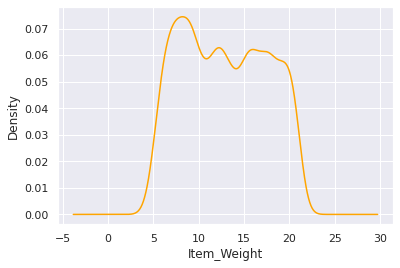

In [9]:
# Plotting the distribution of Item_Weight
train_df.Item_Weight.plot.density(color="Orange")
plt.xlabel("Item_Weight")

As per the Metrics in the above table the given disttibution is likely to be Normal Distribution

          sumsquare_error         aic           bic  kl_div
exponpow       213.941760  131.935444 -31378.567954     inf
chi2           242.891285   -8.854141 -30296.912925     inf
gamma          242.896894   -8.852599 -30296.716102     inf
lognorm        266.608127   -2.808564 -29502.859668     inf
expon          333.913861  -42.651731 -27593.355886     inf


Text(0.5, 0, 'Item_Visibility')

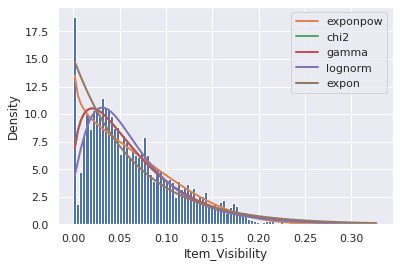

In [10]:
# Plotting the distribution of Item_Visibility
item_visibility = train_df["Item_Visibility"].values
f = Fitter(item_visibility, distributions=get_common_distributions())
f.fit()
print(f.summary())
plt.ylabel("Density")
plt.xlabel("Item_Visibility")

As per the Metrics in the above table the given disttibution is likely to be exponpow

          sumsquare_error          aic            bic  kl_div
uniform          0.000357  1096.425732 -144761.552511     inf
rayleigh         0.000364  1129.040794 -144604.546856     inf
gamma            0.000366  1136.710365 -144555.417637     inf
lognorm          0.000368  1137.020119 -144497.318097     inf
norm             0.000369  1135.051785 -144500.991308     inf


Text(0.5, 0, 'Item MRP')

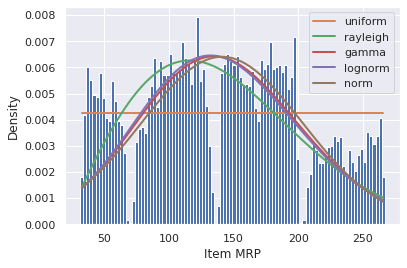

In [11]:
# Plotting the distribution of Item_MRP
item_mrp = train_df["Item_MRP"].values
f = Fitter(item_mrp, distributions=get_common_distributions())
f.fit()
print(f.summary())
plt.ylabel("Density")
plt.xlabel("Item MRP")

As per the Metrics in the above table the given disttibution is likely to be Uniform

          sumsquare_error          aic           bic  kl_div
lognorm          1.565401  1000.862143 -73290.946246     inf
powerlaw         1.586853   785.239552 -73174.940501     inf
chi2             1.817236  1102.391565 -72019.530119     inf
uniform          1.856291   639.610766 -71847.351487     inf
expon            1.892141   701.420694 -71684.320107     inf


Text(0.5, 0, 'Establishment Year')

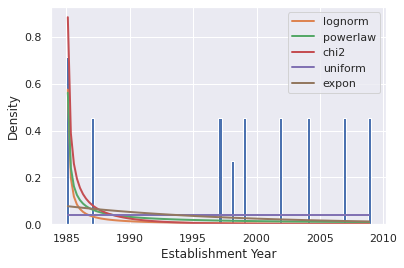

In [12]:
# Plotting the distribution of Outlet_Establishment_Year
outlet_Establishment_Year = train_df["Outlet_Establishment_Year"].values
f = Fitter(outlet_Establishment_Year, distributions=get_common_distributions())
f.fit()
print(f.summary())
plt.ylabel("Density")
plt.xlabel("Establishment Year")

As per the Metrics in the above table the given disttibution is likely to be LogNormal, but it is due to more number of stores on the 1985's. The given distribution is more of Uniform

          sumsquare_error          aic            bic  kl_div
exponpow     2.264308e-08  2499.154518 -227144.338578     inf
gamma        3.099132e-08  2195.888306 -224469.369012     inf
expon        8.040404e-08  2146.171677 -216352.957301     inf
rayleigh     1.685645e-07  2594.098450 -210043.771360     inf
norm         2.639352e-07  2822.334565 -206222.183764     inf


Text(0.5, 0, 'Outlet Sales')

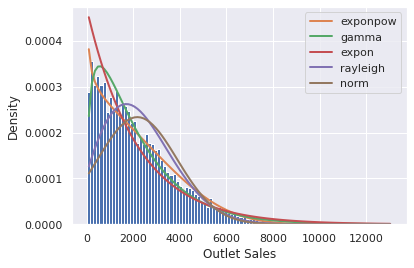

In [13]:
# Plotting the distribution of Item_Outlet_Sales
item_Outlet_Sales = train_df["Item_Outlet_Sales"].values
f = Fitter(item_Outlet_Sales, distributions=get_common_distributions())
f.fit()
print(f.summary())
plt.ylabel("Density")
plt.xlabel("Outlet Sales")

As per the Metrics in the above table the given disttibution is likely to be exponpow

In [14]:
# Missing Values in Training Data
print(train_df.isnull().sum())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [15]:
# Missing Values in Testing Data
print(test_df.isnull().sum())

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64


**Question 2**:- Are there missing values?     
**Answer 2**:- Yes the training and testing data have a few missing values. 

**Question 5:-** Which independent variables have missing data? How much?  
**Answer 5:-** Item Weight and Outlet Size have 17.16% and 28.27% missing data respectively in training dataset and 17.18 and 28.26% missing data respectively in test dataset.

In [16]:
# % of missing data in training dataset
print(
    "Percent of Missing Data in Train Data Item Weight Coloumn = "
    + str((train_df["Item_Weight"].isnull().sum() / len(train_df)) * 100)
    + " %"
)
print(
    "Percent of Missing Data in Train Data Outlet Size Coloumn = "
    + str((train_df["Outlet_Size"].isnull().sum() / len(train_df)) * 100)
    + " %"
)

Percent of Missing Data in Train Data Item Weight Coloumn = 17.165317376510618 %
Percent of Missing Data in Train Data Outlet Size Coloumn = 28.27642848762173 %


In [17]:
# % of missing data in testing dataset
print(
    "Percent of Missing Data in Test Data Item Weight Coloumn = "
    + str((test_df["Item_Weight"].isnull().sum() / len(test_df)) * 100)
    + " %"
)
print(
    "Percent of Missing Data in Test Data Outlet Size Coloumn = "
    + str((test_df["Outlet_Size"].isnull().sum() / len(test_df)) * 100)
    + " %"
)

Percent of Missing Data in Test Data Item Weight Coloumn = 17.180073930646014 %
Percent of Missing Data in Test Data Outlet Size Coloumn = 28.269670832599896 %


## Exploratory Data Analysis

In [18]:
# Identifying the Datatypes of the coloumns
train_df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

Distribution of Every Numeric Feature

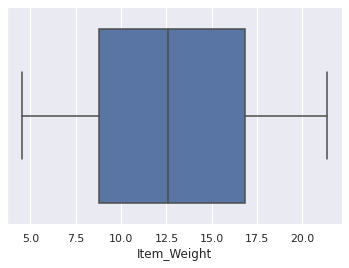

In [19]:
sns.boxplot(x=train_df["Item_Weight"])

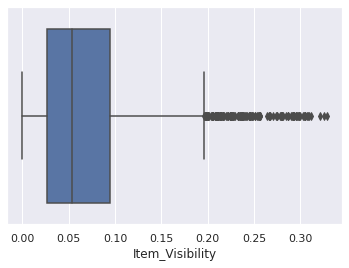

In [20]:
sns.boxplot(x=train_df["Item_Visibility"])  # Visibilities have outliers

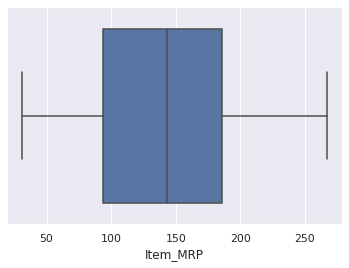

In [21]:
sns.boxplot(x=train_df["Item_MRP"])

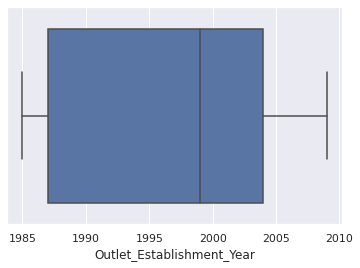

In [22]:
sns.boxplot(x=train_df["Outlet_Establishment_Year"])

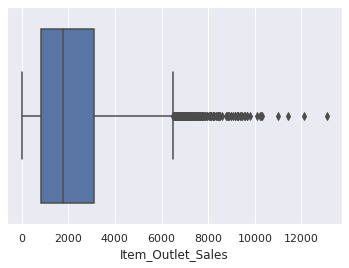

In [23]:
sns.boxplot(x=train_df["Item_Outlet_Sales"])  # Sales have outliers

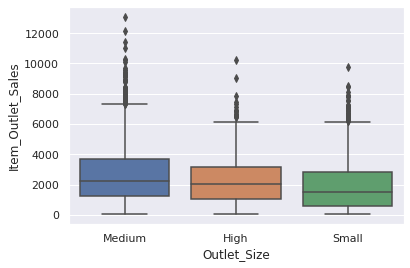

In [24]:
# Sales of Market according to their size
sns.boxplot(x="Outlet_Size", y="Item_Outlet_Sales", data=train_df)

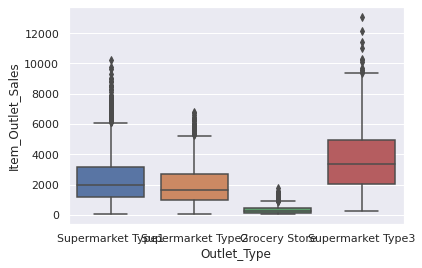

In [25]:
# Lets see how sales vary with outlet type
sns.boxplot(x="Outlet_Type", y="Item_Outlet_Sales", data=train_df)

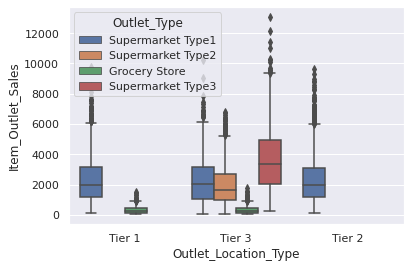

In [26]:
# Lets see how sales vary with the location type(Tier of City) and what kind of business is prevelent in specific city_type
sns.boxplot(
    x="Outlet_Location_Type", y="Item_Outlet_Sales", hue="Outlet_Type", data=train_df
)

Feature Engineering
- We will do some feature engineering on our training data and implement those on test data

In [27]:
# This code will do some data cleaning by correctly assigning Low_Fat/Regular category on both training and testing data
train_df["Item_Fat_Content"] = train_df["Item_Fat_Content"].replace(
    {"LF": "Low_Fat", "reg": "Regular", "low fat": "Low_Fat", "Low Fat": "Low_Fat"}
)

test_df["Item_Fat_Content"] = test_df["Item_Fat_Content"].replace(
    {"LF": "Low_Fat", "reg": "Regular", "low fat": "Low_Fat", "Low Fat": "Low_Fat"}
)

In [28]:
# Calculating Age of outlet
train_df["Outlet_Age"] = train_df["Outlet_Establishment_Year"] - (
    train_df["Outlet_Establishment_Year"].min() - 1
)

test_df["Outlet_Age"] = test_df["Outlet_Establishment_Year"] - (
    test_df["Outlet_Establishment_Year"].min() - 1
)

**Question 7:-** Are the predictor variables independent of all the other predictor variables?    
**Answer 7:-** As we can see in the above pair-plot, there is no significant collinearity between any features and they are mostly in-dependent of each other. The only collinearity here is visible in between Outlet_Age and Out_Establishment_Year, because Outlet_Age is feature engineered using Out_Establishment_Year. Out_Establishment_Year is dropped from the training dataset while we train the model, which leaves our dataset free from any significant collinearity. 


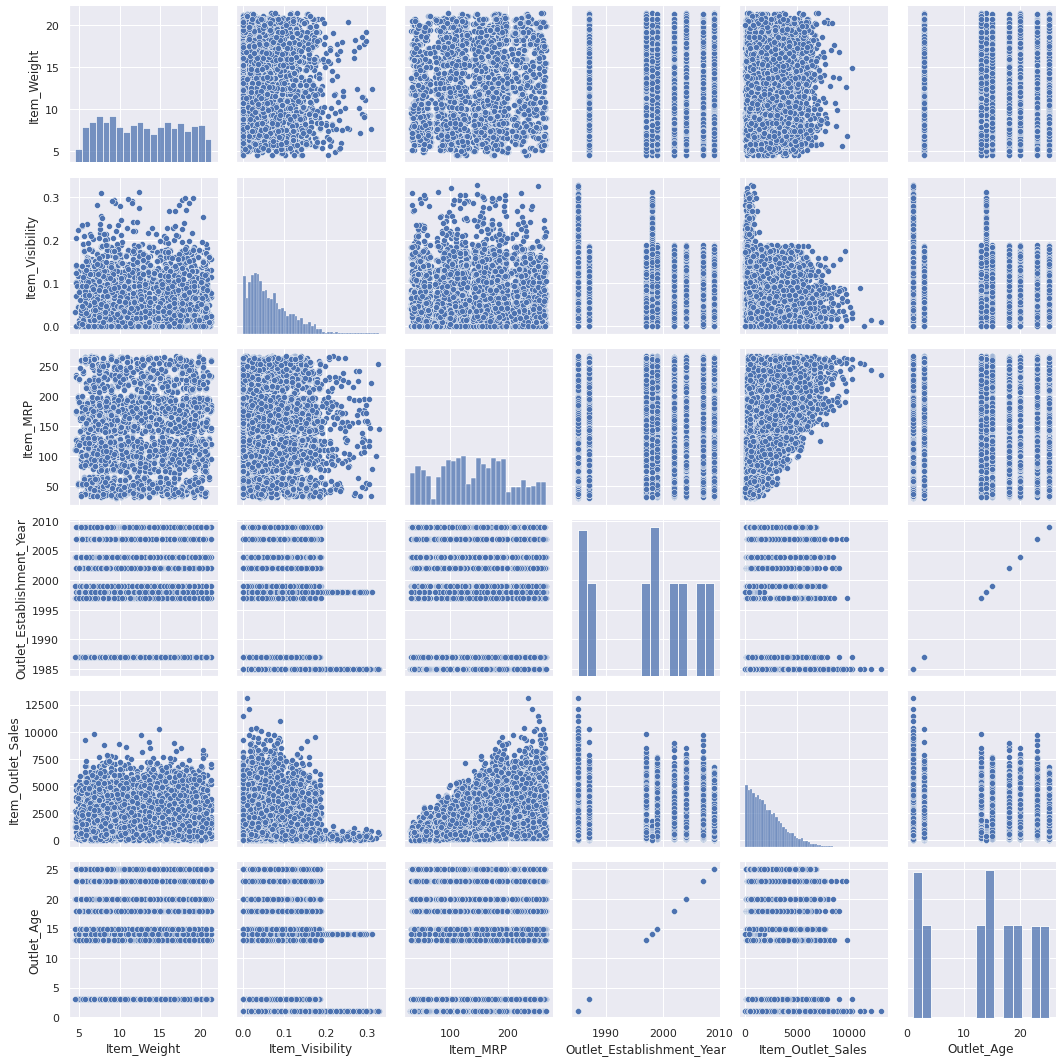

In [29]:
# Are the independent variables dependent on other independent variables?
sns.pairplot(train_df)
# From this plot we can figure out if our data has any colinearity in our data, as we can see in the below plot that our dataset doesn't have any significant colinearity

In [30]:
# Categorical or Numerical Coloumns
categorical_columns = [
    col for col in train_df.columns if train_df[col].dtype == "object"
]
print("Categorical Columns : ", categorical_columns)

categorical_columns = list(set(categorical_columns))

numerical_columns = [col for col in train_df.columns if col not in categorical_columns]
print("Numerical Columns : ", numerical_columns)

Categorical Columns :  ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
Numerical Columns :  ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'Outlet_Age']


**Question 1**:- What are the data types? (Only numeric and categorical)

**Answer 1:-** 
Categorical Columns :  
['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

Numerical Columns :  
['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'Outlet_Age']


**Question 10 (For Categorical Data):-** What are the distributions of the predictor variables? 

**Answer 10:-** Here are the quick snapshots of the distribution of categorical data.


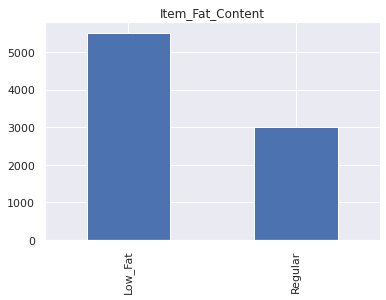

In [31]:
# Distribution of Caregorical Data
plt.title("Item_Fat_Content")
train_df["Item_Fat_Content"].value_counts().plot(kind="bar")

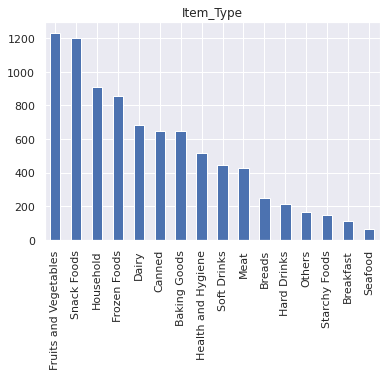

In [32]:
# Distribution of Caregorical Data
plt.title("Item_Type")
train_df["Item_Type"].value_counts().plot(kind="bar")

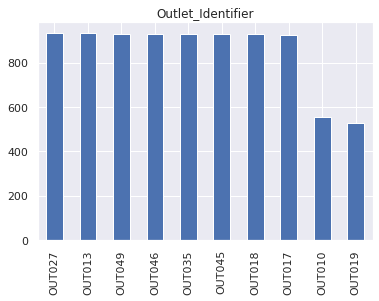

In [33]:
# Distribution of Caregorical Data
plt.title("Outlet_Identifier")
train_df["Outlet_Identifier"].value_counts().plot(kind="bar")

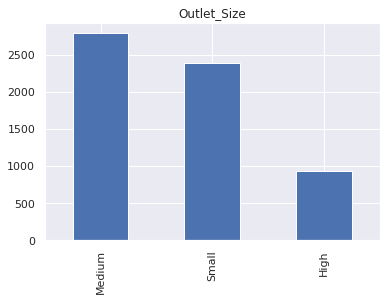

In [34]:
# Distribution of Caregorical Data
plt.title("Outlet_Size")
train_df["Outlet_Size"].value_counts().plot(kind="bar")

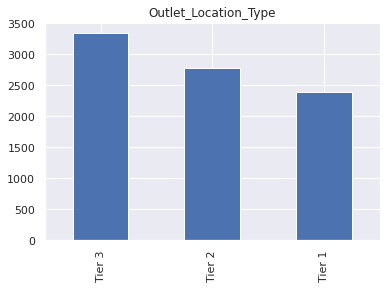

In [35]:
# Distribution of Caregorical Data
plt.title("Outlet_Location_Type")
train_df["Outlet_Location_Type"].value_counts().plot(kind="bar")

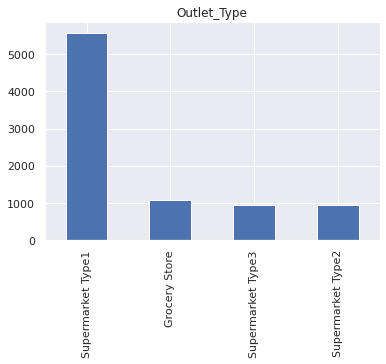

In [36]:
# Distribution of Caregorical Data
plt.title("Outlet_Type")
train_df["Outlet_Type"].value_counts().plot(kind="bar")

## Data Imputation - KNN Imputation Method

In [37]:
# Initializing objects
encoder = OrdinalEncoder()
imputer = KNN()

In [38]:
# function to encode non-null data and replace it in the original data
def encode(data):
    # retains only non-null values
    nonulls = np.array(data.dropna())
    # reshapes the data for encoding
    impute_reshape = nonulls.reshape(-1, 1)
    # encode date
    impute_ordinal = encoder.fit_transform(impute_reshape)
    # Assign back encoded values to non-null values
    data.loc[data.notnull()] = np.squeeze(impute_ordinal)
    return data

In [39]:
# Function to impute data using KNN method
def knn_impute(train_df):
    for i in categorical_columns:
        encode(train_df[i])
    knn_impute_train_df = pd.DataFrame(
        (imputer.fit_transform(train_df)), columns=train_df.columns
    )
    knn_impute_train_df["Outlet_Size"] = knn_impute_train_df["Outlet_Size"].round()
    return knn_impute_train_df

In [40]:
# Performing imputation on training and testing data using KNN imputation
knn_impute_train_df = knn_impute(train_df)
knn_impute_test_df = knn_impute(test_df)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

Imputing row 1/8523 with 0 missing, elapsed time: 14.311
Imputing row 101/8523 with 1 missing, elapsed time: 14.316
Imputing row 201/8523 with 1 missing, elapsed time: 14.320
Imputing row 301/8523 with 1 missing, elapsed time: 14.325
Imputing row 401/8523 with 1 missing, elapsed time: 14.329
Imputing row 501/8523 with 1 missing, elapsed time: 14.333
Imputing row 601/8523 with 0 missing, elapsed time: 14.338
Imputing row 701/8523 with 1 missing, elapsed time: 14.341
Imputing row 801/8523 with 0 missing, elapsed time: 14.345
Imputing row 901/8523 with 1 missing, elapsed time: 14.349
Imputing row 1001/8523 with 1 missing, elapsed time: 14.354
Imputing row 1101/8523 with 1 missing, elapsed time: 14.358
Imputing row 1201/8523 with 0 missing, elapsed time: 14.362
Imputing row 1301/8523 with 0 missing, elapsed time: 14.367
Imputing row 1401/8523 with 1 missing, elapsed time: 14.371
Imputing row 1501/8523 with 0 missing, elapsed time: 14.375
Imputing row 1601/8523 with 1 missing, elapsed time:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

Imputing row 1/5681 with 0 missing, elapsed time: 5.967
Imputing row 101/5681 with 0 missing, elapsed time: 5.971
Imputing row 201/5681 with 1 missing, elapsed time: 5.974
Imputing row 301/5681 with 1 missing, elapsed time: 5.977
Imputing row 401/5681 with 0 missing, elapsed time: 5.981
Imputing row 501/5681 with 0 missing, elapsed time: 5.984
Imputing row 601/5681 with 1 missing, elapsed time: 5.987
Imputing row 701/5681 with 0 missing, elapsed time: 5.991
Imputing row 801/5681 with 1 missing, elapsed time: 5.994
Imputing row 901/5681 with 0 missing, elapsed time: 5.997
Imputing row 1001/5681 with 1 missing, elapsed time: 6.000
Imputing row 1101/5681 with 0 missing, elapsed time: 6.003
Imputing row 1201/5681 with 0 missing, elapsed time: 6.007
Imputing row 1301/5681 with 1 missing, elapsed time: 6.010
Imputing row 1401/5681 with 1 missing, elapsed time: 6.013
Imputing row 1501/5681 with 1 missing, elapsed time: 6.016
Imputing row 1601/5681 with 1 missing, elapsed time: 6.019
Imputing 

In [41]:
# Checking if entries are imputed
print(train_df.isnull().sum())
print("\nAfter Imputing the Data\n")
print(knn_impute_train_df.isnull().sum())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Outlet_Age                      0
dtype: int64

After Imputing the Data

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Outlet_Age                   0
dtype: int64


Text(0.5, 0, 'Item Weight')

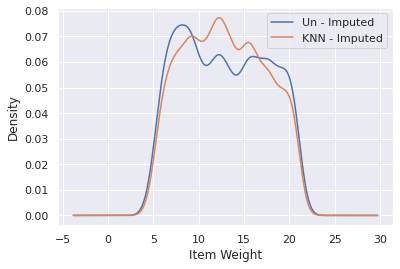

In [42]:
# Statistical Difference in Item Weight after KNN Imputation
train_df.Item_Weight.plot(kind="kde")
knn_impute_train_df.Item_Weight.plot(kind="kde")
plt.legend(["Un - Imputed", "KNN - Imputed"])
plt.xlabel("Item Weight")

Text(0.5, 0, 'Outlet Size')

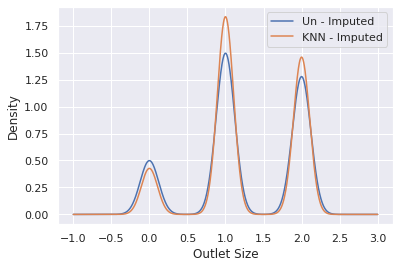

In [43]:
# Statistical Difference in Outlet Size after KNN Imputation
train_df.Outlet_Size.plot(kind="kde")
knn_impute_train_df.Outlet_Size.plot(kind="kde")
plt.legend(["Un - Imputed", "KNN - Imputed"])
plt.xlabel("Outlet Size")

Data Imputataion - Mean & Mode imputation
- I will be using mean imputation for Item Weight as it is a continous variable
- I will be using mode imputation for Outlet Size as it is a discrete variable

In [44]:
# Function to impute data using mean & mode method
def mm_impute(train_df):
    mm_impute_train_df = train_df.copy()  # Make a copy of dataframe for imputation
    mm_impute_train_df["Item_Weight"] = mm_impute_train_df["Item_Weight"].fillna(
        mm_impute_train_df["Item_Weight"].mean()
    )
    mm_impute_train_df["Outlet_Size"] = mm_impute_train_df["Outlet_Size"].fillna(
        mm_impute_train_df["Outlet_Size"].mode()[0]
    )
    return mm_impute_train_df

In [45]:
# Performing imputation on training and testing data using Mean Mode method
mm_impute_train_df = mm_impute(train_df)  # Imputing Training Data
mm_impute_test_df = mm_impute(test_df)  # Imputing Testing Data

In [46]:
# Checking if Data is Imputed
print(train_df.isnull().sum())
print("\nAfter Imputing the Data\n")
print(mm_impute_train_df.isnull().sum())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Outlet_Age                      0
dtype: int64

After Imputing the Data

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Outlet_Age                   0
dtype: int64


Text(0.5, 0, 'Item Weight')

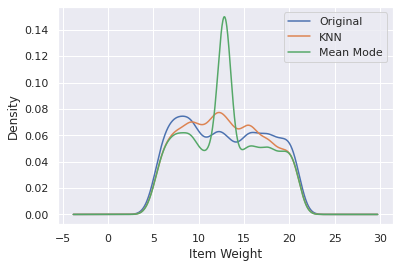

In [47]:
# Statistical Difference in Item Weight after KNN Imputationa and Mean Mode Imputation
train_df.Item_Weight.plot(kind="kde")
knn_impute_train_df.Item_Weight.plot(kind="kde")
mm_impute_train_df.Item_Weight.plot(kind="kde")
plt.legend(["Original", "KNN", "Mean Mode"])
plt.xlabel("Item Weight")

Text(0.5, 0, 'Outlet Size')

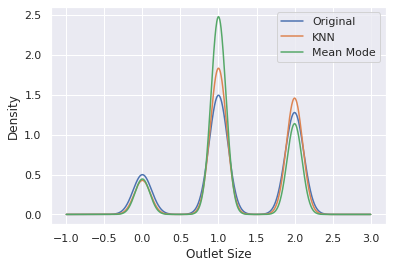

In [48]:
# Statistical Difference in Outlet Size after KNN Imputationa and Mean Mode Imputation
train_df.Outlet_Size.plot(kind="kde")
knn_impute_train_df.Outlet_Size.plot(kind="kde")
mm_impute_train_df.Outlet_Size.plot(kind="kde")
plt.legend(["Original", "KNN", "Mean Mode"])
plt.xlabel("Outlet Size")

Data Imputation - MICE(Multivariate imputation by chained equations) Method

In [49]:
# Function to impute data using MICE method
def mice_impute(train_df):
    mice_imputed_train_df = pd.DataFrame(
        MICE().fit_transform(train_df), columns=list(train_df.columns)
    )
    mice_imputed_train_df["Outlet_Size"] = mice_imputed_train_df[
        "Outlet_Size"
    ].round()  # Fixing Categorical Values - Outlet Size
    return mice_imputed_train_df

In [50]:
# Performing imputation on training and testing data using MICE imputation
mice_imputed_train_df = mice_impute(train_df)  # Imputing Training Data
mice_imputed_test_df = mice_impute(test_df)  # Imputing Testing Data

In [51]:
# Checking if Data is imputed
print(train_df.isnull().sum())
print("\nAfter Imputing the Data\n")
print(mice_imputed_train_df.isnull().sum())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Outlet_Age                      0
dtype: int64

After Imputing the Data

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Outlet_Age                   0
dtype: int64


Text(0.5, 0, 'Item Weight')

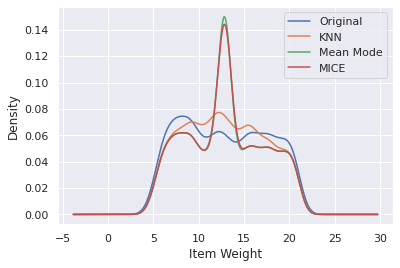

In [52]:
# Statistical Difference in Item Weight after KNN Imputationa, Mean Mode Imputation and MICE Imputation
train_df.Item_Weight.plot(kind="kde")
knn_impute_train_df.Item_Weight.plot(kind="kde")
mm_impute_train_df.Item_Weight.plot(kind="kde")
mice_imputed_train_df.Item_Weight.plot(kind="kde")
plt.legend(["Original", "KNN", "Mean Mode", "MICE"])
plt.xlabel("Item Weight")

Text(0.5, 0, 'Outlet Size')

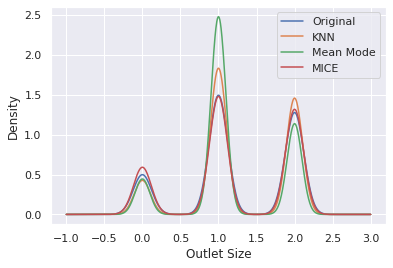

In [53]:
# Statistical Difference in Outlet Size after KNN Imputationa and Mean Mode Imputation
train_df.Outlet_Size.plot(kind="kde")
knn_impute_train_df.Outlet_Size.plot(kind="kde")
mm_impute_train_df.Outlet_Size.plot(kind="kde")
mice_imputed_train_df.Outlet_Size.plot(kind="kde")
plt.legend(["Original", "KNN", "Mean Mode", "MICE"])
plt.xlabel("Outlet Size")

- As We can see that KNN workes better on numeric data and MICE has worked better on categorical data in our case
- AS KNN seems a much better choice for my whole dataset, I have decided to go ahead with KNN based Imputed Data

In [54]:
knn_impute_train_df  # Training Data after KNN imputation

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,156.0,9.300,0.0,0.016047,4.0,249.8092,9.0,1999.0,1.0,0.0,1.0,3735.1380,15.0
1,8.0,5.920,1.0,0.019278,14.0,48.2692,3.0,2009.0,1.0,2.0,2.0,443.4228,25.0
2,662.0,17.500,0.0,0.016760,10.0,141.6180,9.0,1999.0,1.0,0.0,1.0,2097.2700,15.0
3,1121.0,19.200,1.0,0.000000,6.0,182.0950,0.0,1998.0,2.0,2.0,0.0,732.3800,14.0
4,1297.0,8.930,0.0,0.000000,9.0,53.8614,1.0,1987.0,0.0,2.0,1.0,994.7052,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370.0,6.865,0.0,0.056783,13.0,214.5218,1.0,1987.0,0.0,2.0,1.0,2778.3834,3.0
8519,897.0,8.380,1.0,0.046982,0.0,108.1570,7.0,2002.0,1.0,1.0,1.0,549.2850,18.0
8520,1357.0,10.600,0.0,0.035186,8.0,85.1224,6.0,2004.0,2.0,1.0,1.0,1193.1136,20.0
8521,681.0,7.210,1.0,0.145221,13.0,103.1332,3.0,2009.0,1.0,2.0,2.0,1845.5976,25.0


In [55]:
knn_impute_test_df  # Testing data after KNN imputation

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age
0,1103.0,20.750000,0.0,0.007565,13.0,107.8622,9.0,1999.0,1.0,0.0,1.0,15.0
1,1067.0,8.300000,1.0,0.038428,4.0,87.3198,2.0,2007.0,1.0,1.0,1.0,23.0
2,1406.0,14.600000,0.0,0.099575,11.0,241.7538,0.0,1998.0,1.0,2.0,0.0,14.0
3,809.0,7.315000,0.0,0.015388,13.0,155.0340,2.0,2007.0,1.0,1.0,1.0,23.0
4,1184.0,13.259639,1.0,0.118599,4.0,234.2300,5.0,1985.0,1.0,2.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,231.0,10.500000,1.0,0.013496,13.0,141.3154,8.0,1997.0,2.0,0.0,1.0,13.0
5677,306.0,7.600000,1.0,0.142991,15.0,169.1448,3.0,2009.0,1.0,2.0,2.0,25.0
5678,1412.0,10.000000,0.0,0.073529,8.0,118.7440,7.0,2002.0,1.0,1.0,1.0,18.0
5679,517.0,15.300000,1.0,0.000000,3.0,214.6218,2.0,2007.0,1.0,1.0,1.0,23.0


To perfom regression analysis we have to transform our categorical data into on-hot encoding.

In [56]:
# Function to One-Hot encode the dataset
def encode_oneHot(df):
    df_one_hot = pd.get_dummies(
        df,
        columns=[
            "Item_Fat_Content",
            "Item_Type",
            "Outlet_Identifier",
            "Outlet_Size",
            "Outlet_Location_Type",
            "Outlet_Type",
        ],
    )
    return df_one_hot

In [57]:
# One hot encoding Training and Test data
knn_impute_train_df_onehot = encode_oneHot(knn_impute_train_df)
knn_impute_test_df_onehot = encode_oneHot(knn_impute_test_df)

Function for feature scaling and Outlier Removal

In [58]:
def remove_outliers(df):  # Function to Remove All outliers
    df_removed_outliers = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
    return df_removed_outliers


def feature_scaling(df):  # Function to scale all the features
    scaler = MinMaxScaler()
    scaler.fit(df)
    scaled_df = scaler.transform(df)
    scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
    return scaled_df

In [59]:
# Feature Scaling Training Data
knn_impute_train_df_onehot_scaled = feature_scaling(knn_impute_train_df_onehot)
# Feature Scaling Testing Data
knn_impute_test_df_onehot_scaled = feature_scaling(knn_impute_test_df_onehot)

# Removing outliers from training data
knn_impute_train_df_onehot_no_outlier = remove_outliers(
    knn_impute_train_df_onehot_scaled
)
# Removing outliers from testing data
knn_impute_test_df_onehot_no_outlier = remove_outliers(knn_impute_test_df_onehot_scaled)

Setting up AutoML Instance

In [60]:
# Setting up maximum runtime for the AutoML
min_mem_size = 6
run_time = 222

pct_memory = 0.5
virtual_memory = psutil.virtual_memory()
min_mem_size = int(round(int(pct_memory * virtual_memory.available) / 1073741824, 0))
print(min_mem_size)

# 65535 Highest port no
# Start the H2O server on a random port
port_no = random.randint(5555, 55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
    h2o.init(
        strict_version_check=False, min_mem_size_GB=min_mem_size, port=port_no
    )  # start h2o
except:
    logging.critical("h2o.init")
    h2o.download_all_logs(dirname=logs_path, filename=logfile)
    h2o.cluster().shutdown()
    sys.exit(2)

6
Checking whether there is an H2O instance running at http://localhost:13369 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.14" 2022-01-18; OpenJDK Runtime Environment (build 11.0.14+9-Ubuntu-0ubuntu2.18.04); OpenJDK 64-Bit Server VM (build 11.0.14+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpksf4q3lq
  JVM stdout: /tmp/tmpksf4q3lq/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpksf4q3lq/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:13369
Connecting to H2O server at http://127.0.0.1:13369 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.0.4
H2O_cluster_version_age:,4 days
H2O_cluster_name:,H2O_from_python_unknownUser_kq228e
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [61]:
def autoML(knn_impute_train_df_onehot_scaled, knn_impute_test_df_onehot_scaled):
    h2o_train_df = h2o.H2OFrame(knn_impute_train_df_onehot_scaled)
    h2o_test_df = h2o.H2OFrame(knn_impute_test_df_onehot_scaled)

    # Double Check the shape of Training and Testing Data
    print(h2o_train_df.shape)
    print(h2o_test_df.shape)

    X = h2o_train_df.columns
    y = "Item_Outlet_Sales"

    X.remove(y)  # Removing the result frm our predictors data
    X.remove(
        "Item_Identifier"
    )  # Removing ID from the predictor's data, as it is not related
    X.remove("Outlet_Establishment_Year")  # Removing to avoid issue of Co-linearity

    aml = H2OAutoML(max_runtime_secs=222, seed=1)  # Setting of AutoML
    aml.train(
        x=X, y=y, training_frame=h2o_train_df
    )  # Trainig the dataset on different models

    return h2o_train_df, h2o_test_df, aml


# Function to get best model from the AutoML leaderboard
def getBestModel(aml):
    model_index = 0
    glm_index = 0
    glm_model = ""
    aml_leaderboard_df = aml.leaderboard.as_data_frame()
    models_dict = {}

    for m in aml_leaderboard_df["model_id"]:
        models_dict[m] = model_index
        if "StackedEnsemble" not in m:
            break
        model_index = model_index + 1

    for m in aml_leaderboard_df["model_id"]:
        if "GLM" in m:
            models_dict[m] = glm_index
            break
        glm_index = glm_index + 1

    print(model_index)
    best_model = h2o.get_model(aml.leaderboard[model_index, "model_id"])
    return best_model

In [62]:
# Training model using Data with Outliers
model_with_outliers = autoML(
    knn_impute_train_df_onehot_scaled, knn_impute_test_df_onehot_scaled
)
best_model_with_outliers = getBestModel(model_with_outliers[2])
print(best_model_with_outliers)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
(8523, 45)
(5681, 44)
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
4
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_grid_1_AutoML_1_20220403_220520_model_2


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,44.0,44.0,11110.0,4.0,4.0,4.0,13.0,16.0,15.5




ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.0064076002177284146
RMSE: 0.08004748726679942
MAE: 0.05625776493461171
RMSLE: 0.06380208126713494
Mean Residual Deviance: 0.0064076002177284146

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 0.006821060716765622
RMSE: 0.08258971314132059
MAE: 0.057912654210191684
RMSLE: 0.06572221935106747
Mean Residual Deviance: 0.006821060716765622

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.057894,0.001650,0.057628,0.059692,0.055944,0.059462,0.056746
1,mean_residual_deviance,0.006832,0.000427,0.006753,0.007137,0.006233,0.007335,0.006700
2,mse,0.006832,0.000427,0.006753,0.007137,0.006233,0.007335,0.006700
3,r2,0.600074,0.017563,0.614231,0.599939,0.603396,0.570521,0.612283
4,residual_deviance,0.006832,0.000427,0.006753,0.007137,0.006233,0.007335,0.006700
5,rmse,0.082621,0.002592,0.082179,0.084479,0.078950,0.085647,0.081852
6,rmsle,0.065755,0.001778,0.065442,0.066819,0.063425,0.068083,0.065006



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2022-04-03 22:08:40,12.633 sec,0.0,0.130722,0.103156,0.017088
1,,2022-04-03 22:08:40,12.725 sec,5.0,0.103413,0.079962,0.010694
2,,2022-04-03 22:08:40,12.793 sec,10.0,0.090719,0.068317,0.008230
3,,2022-04-03 22:08:40,12.860 sec,15.0,0.085123,0.062294,0.007246
4,,2022-04-03 22:08:40,12.929 sec,20.0,0.082813,0.059348,0.006858
5,,2022-04-03 22:08:40,12.998 sec,25.0,0.081767,0.057921,0.006686
6,,2022-04-03 22:08:40,13.081 sec,30.0,0.081194,0.057229,0.006592
7,,2022-04-03 22:08:40,13.150 sec,35.0,0.080698,0.056766,0.006512
8,,2022-04-03 22:08:40,13.229 sec,40.0,0.080278,0.056458,0.006445
9,,2022-04-03 22:08:40,13.285 sec,44.0,0.080047,0.056258,0.006408



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Item_MRP,250.642929,1.000000,0.555824
1,Outlet_Type_0.0,93.754860,0.374057,0.207910
2,Outlet_Identifier_5.0,28.125856,0.112215,0.062372
3,Outlet_Age,18.218321,0.072686,0.040401
4,Outlet_Identifier_4.0,16.727278,0.066737,0.037094
5,Outlet_Identifier_0.0,15.644478,0.062417,0.034693
6,Outlet_Type_3.0,13.639451,0.054418,0.030247
7,Outlet_Type_1.0,3.776147,0.015066,0.008374
8,Item_Weight,3.703639,0.014777,0.008213
9,Item_Visibility,1.838452,0.007335,0.004077



See the whole table with table.as_data_frame()



In [63]:
# Training Model after removing outliers from dataset
model_with_no_outliers = autoML(
    knn_impute_train_df_onehot_no_outlier, knn_impute_test_df_onehot_no_outlier
)
best_model_with_no_outliers = getBestModel(model_with_no_outliers[2])
print(best_model_with_no_outliers)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
(3630, 45)
(2410, 44)
AutoML progress: |
22:09:06.74: _train param, Dropping bad and constant columns: [Item_Type_12.0, Item_Type_14.0, Item_Type_15.0, Item_Type_10.0, Outlet_Type_0.0, Item_Type_11.0, Outlet_Identifier_0.0, Item_Type_8.0, Item_Type_7.0, Item_Type_4.0, Item_Type_3.0, Item_Type_2.0, Outlet_Identifier_4.0, Item_Type_1.0, Item_Type_0.0]

██
22:09:13.77: _train param, Dropping bad and constant columns: [Item_Type_12.0, Item_Type_14.0, Item_Type_15.0, Item_Type_10.0, Outlet_Type_0.0, Item_Type_11.0, Outlet_Identifier_0.0, Item_Type_8.0, Item_Type_7.0, Item_Type_4.0, Item_Type_3.0, Item_Type_2.0, Outlet_Identifier_4.0, Item_Type_1.0, Item_Type_0.0]

█
22:09:16.80: _train param, Dropping bad and constant columns: [Item_Type_12.0, Item_Type_14.0, Item_Type_15.0, Item_Type_10.0, Outlet_Type_0

,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,46.0,46.0,15234.0,6.0,11.0,8.130435,18.0,24.0,21.586956




ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.0062522130292962915
RMSE: 0.07907093669165866
MAE: 0.05966123457402812
RMSLE: 0.06414420502599161
Mean Residual Deviance: 0.0062522130292962915

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 0.007056082078359839
RMSE: 0.08400048856024493
MAE: 0.06342864609653569
RMSLE: 0.06817052841685811
Mean Residual Deviance: 0.007056082078359839

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.063453,0.001350,0.064888,0.063966,0.063936,0.061293,0.063181
1,mean_residual_deviance,0.007067,0.000252,0.007312,0.007161,0.007133,0.006642,0.007086
2,mse,0.007067,0.000252,0.007312,0.007161,0.007133,0.006642,0.007086
3,r2,0.491691,0.027384,0.450850,0.482138,0.492416,0.518267,0.514786
4,residual_deviance,0.007067,0.000252,0.007312,0.007161,0.007133,0.006642,0.007086
5,rmse,0.084052,0.001514,0.085513,0.084621,0.084455,0.081496,0.084176
6,rmsle,0.068228,0.001400,0.069616,0.069061,0.068544,0.065983,0.067938



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2022-04-03 22:09:19,2.972 sec,0.0,0.117980,0.095657,0.013919
1,,2022-04-03 22:09:19,3.023 sec,5.0,0.099678,0.079967,0.009936
2,,2022-04-03 22:09:19,3.074 sec,10.0,0.090326,0.071246,0.008159
3,,2022-04-03 22:09:19,3.126 sec,15.0,0.087117,0.068032,0.007589
4,,2022-04-03 22:09:19,3.172 sec,20.0,0.083501,0.064116,0.006972
5,,2022-04-03 22:09:19,3.250 sec,25.0,0.081832,0.062205,0.006696
6,,2022-04-03 22:09:19,3.341 sec,30.0,0.080836,0.061206,0.006534
7,,2022-04-03 22:09:19,3.424 sec,35.0,0.080164,0.060540,0.006426
8,,2022-04-03 22:09:19,3.507 sec,40.0,0.079631,0.060110,0.006341
9,,2022-04-03 22:09:19,3.594 sec,45.0,0.079086,0.059681,0.006255



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Item_MRP,101.708740,1.000000,0.769706
1,Outlet_Identifier_5.0,8.098296,0.079622,0.061286
2,Outlet_Type_3.0,4.515833,0.044400,0.034175
3,Outlet_Age,4.134974,0.040655,0.031292
4,Item_Visibility,4.076146,0.040077,0.030847
5,Item_Weight,3.914361,0.038486,0.029623
6,Outlet_Size_1.0,0.698506,0.006868,0.005286
7,Outlet_Type_2.0,0.635700,0.006250,0.004811
8,Outlet_Location_Type_2.0,0.510028,0.005015,0.003860
9,Outlet_Identifier_7.0,0.432231,0.004250,0.003271



See the whole table with table.as_data_frame()



## As we can see that few coloumns which are on-hot encoded features in the dataset are constant after removing the outliers i.e. thay have a unique value for entire dataset. Hence, we are getting the prompt - We don't have to worry about it, because AutoML detects such kind of constant attributes and remove them.

In [64]:
# Evaluating if model is learning better from data with or without outliers
print(best_model_with_outliers.get_params)

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_grid_1_AutoML_1_20220403_220520_model_2


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,44.0,44.0,11110.0,4.0,4.0,4.0,13.0,16.0,15.5




ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.0064076002177284146
RMSE: 0.08004748726679942
MAE: 0.05625776493461171
RMSLE: 0.06380208126713494
Mean Residual Deviance: 0.0064076002177284146

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 0.006821060716765622
RMSE: 0.08258971314132059
MAE: 0.057912654210191684
RMSLE: 0.06572221935106747
Mean Residual Deviance: 0.006821060716765622

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.057894,0.001650,0.057628,0.059692,0.055944,0.059462,0.056746
1,mean_residual_deviance,0.006832,0.000427,0.006753,0.007137,0.006233,0.007335,0.006700
2,mse,0.006832,0.000427,0.006753,0.007137,0.006233,0.007335,0.006700
3,r2,0.600074,0.017563,0.614231,0.599939,0.603396,0.570521,0.612283
4,residual_deviance,0.006832,0.000427,0.006753,0.007137,0.006233,0.007335,0.006700
5,rmse,0.082621,0.002592,0.082179,0.084479,0.078950,0.085647,0.081852
6,rmsle,0.065755,0.001778,0.065442,0.066819,0.063425,0.068083,0.065006



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2022-04-03 22:08:40,12.633 sec,0.0,0.130722,0.103156,0.017088
1,,2022-04-03 22:08:40,12.725 sec,5.0,0.103413,0.079962,0.010694
2,,2022-04-03 22:08:40,12.793 sec,10.0,0.090719,0.068317,0.008230
3,,2022-04-03 22:08:40,12.860 sec,15.0,0.085123,0.062294,0.007246
4,,2022-04-03 22:08:40,12.929 sec,20.0,0.082813,0.059348,0.006858
5,,2022-04-03 22:08:40,12.998 sec,25.0,0.081767,0.057921,0.006686
6,,2022-04-03 22:08:40,13.081 sec,30.0,0.081194,0.057229,0.006592
7,,2022-04-03 22:08:40,13.150 sec,35.0,0.080698,0.056766,0.006512
8,,2022-04-03 22:08:40,13.229 sec,40.0,0.080278,0.056458,0.006445
9,,2022-04-03 22:08:40,13.285 sec,44.0,0.080047,0.056258,0.006408



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Item_MRP,250.642929,1.000000,0.555824
1,Outlet_Type_0.0,93.754860,0.374057,0.207910
2,Outlet_Identifier_5.0,28.125856,0.112215,0.062372
3,Outlet_Age,18.218321,0.072686,0.040401
4,Outlet_Identifier_4.0,16.727278,0.066737,0.037094
5,Outlet_Identifier_0.0,15.644478,0.062417,0.034693
6,Outlet_Type_3.0,13.639451,0.054418,0.030247
7,Outlet_Type_1.0,3.776147,0.015066,0.008374
8,Item_Weight,3.703639,0.014777,0.008213
9,Item_Visibility,1.838452,0.007335,0.004077



See the whole table with table.as_data_frame()
<bound method H2OEstimator.get_params of >


In [65]:
print(best_model_with_no_outliers.get_params)

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_1_AutoML_2_20220403_220906


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,46.0,46.0,15234.0,6.0,11.0,8.130435,18.0,24.0,21.586956




ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.0062522130292962915
RMSE: 0.07907093669165866
MAE: 0.05966123457402812
RMSLE: 0.06414420502599161
Mean Residual Deviance: 0.0062522130292962915

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 0.007056082078359839
RMSE: 0.08400048856024493
MAE: 0.06342864609653569
RMSLE: 0.06817052841685811
Mean Residual Deviance: 0.007056082078359839

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.063453,0.001350,0.064888,0.063966,0.063936,0.061293,0.063181
1,mean_residual_deviance,0.007067,0.000252,0.007312,0.007161,0.007133,0.006642,0.007086
2,mse,0.007067,0.000252,0.007312,0.007161,0.007133,0.006642,0.007086
3,r2,0.491691,0.027384,0.450850,0.482138,0.492416,0.518267,0.514786
4,residual_deviance,0.007067,0.000252,0.007312,0.007161,0.007133,0.006642,0.007086
5,rmse,0.084052,0.001514,0.085513,0.084621,0.084455,0.081496,0.084176
6,rmsle,0.068228,0.001400,0.069616,0.069061,0.068544,0.065983,0.067938



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2022-04-03 22:09:19,2.972 sec,0.0,0.117980,0.095657,0.013919
1,,2022-04-03 22:09:19,3.023 sec,5.0,0.099678,0.079967,0.009936
2,,2022-04-03 22:09:19,3.074 sec,10.0,0.090326,0.071246,0.008159
3,,2022-04-03 22:09:19,3.126 sec,15.0,0.087117,0.068032,0.007589
4,,2022-04-03 22:09:19,3.172 sec,20.0,0.083501,0.064116,0.006972
5,,2022-04-03 22:09:19,3.250 sec,25.0,0.081832,0.062205,0.006696
6,,2022-04-03 22:09:19,3.341 sec,30.0,0.080836,0.061206,0.006534
7,,2022-04-03 22:09:19,3.424 sec,35.0,0.080164,0.060540,0.006426
8,,2022-04-03 22:09:19,3.507 sec,40.0,0.079631,0.060110,0.006341
9,,2022-04-03 22:09:19,3.594 sec,45.0,0.079086,0.059681,0.006255



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Item_MRP,101.708740,1.000000,0.769706
1,Outlet_Identifier_5.0,8.098296,0.079622,0.061286
2,Outlet_Type_3.0,4.515833,0.044400,0.034175
3,Outlet_Age,4.134974,0.040655,0.031292
4,Item_Visibility,4.076146,0.040077,0.030847
5,Item_Weight,3.914361,0.038486,0.029623
6,Outlet_Size_1.0,0.698506,0.006868,0.005286
7,Outlet_Type_2.0,0.635700,0.006250,0.004811
8,Outlet_Location_Type_2.0,0.510028,0.005015,0.003860
9,Outlet_Identifier_7.0,0.432231,0.004250,0.003271



See the whole table with table.as_data_frame()
<bound method H2OEstimator.get_params of >


In [66]:
best_model_with_outliers.explain

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_grid_1_AutoML_1_20220403_220520_model_2


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,44.0,44.0,11110.0,4.0,4.0,4.0,13.0,16.0,15.5




ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.0064076002177284146
RMSE: 0.08004748726679942
MAE: 0.05625776493461171
RMSLE: 0.06380208126713494
Mean Residual Deviance: 0.0064076002177284146

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 0.006821060716765622
RMSE: 0.08258971314132059
MAE: 0.057912654210191684
RMSLE: 0.06572221935106747
Mean Residual Deviance: 0.006821060716765622

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.057894,0.001650,0.057628,0.059692,0.055944,0.059462,0.056746
1,mean_residual_deviance,0.006832,0.000427,0.006753,0.007137,0.006233,0.007335,0.006700
2,mse,0.006832,0.000427,0.006753,0.007137,0.006233,0.007335,0.006700
3,r2,0.600074,0.017563,0.614231,0.599939,0.603396,0.570521,0.612283
4,residual_deviance,0.006832,0.000427,0.006753,0.007137,0.006233,0.007335,0.006700
5,rmse,0.082621,0.002592,0.082179,0.084479,0.078950,0.085647,0.081852
6,rmsle,0.065755,0.001778,0.065442,0.066819,0.063425,0.068083,0.065006



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2022-04-03 22:08:40,12.633 sec,0.0,0.130722,0.103156,0.017088
1,,2022-04-03 22:08:40,12.725 sec,5.0,0.103413,0.079962,0.010694
2,,2022-04-03 22:08:40,12.793 sec,10.0,0.090719,0.068317,0.008230
3,,2022-04-03 22:08:40,12.860 sec,15.0,0.085123,0.062294,0.007246
4,,2022-04-03 22:08:40,12.929 sec,20.0,0.082813,0.059348,0.006858
5,,2022-04-03 22:08:40,12.998 sec,25.0,0.081767,0.057921,0.006686
6,,2022-04-03 22:08:40,13.081 sec,30.0,0.081194,0.057229,0.006592
7,,2022-04-03 22:08:40,13.150 sec,35.0,0.080698,0.056766,0.006512
8,,2022-04-03 22:08:40,13.229 sec,40.0,0.080278,0.056458,0.006445
9,,2022-04-03 22:08:40,13.285 sec,44.0,0.080047,0.056258,0.006408



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Item_MRP,250.642929,1.000000,0.555824
1,Outlet_Type_0.0,93.754860,0.374057,0.207910
2,Outlet_Identifier_5.0,28.125856,0.112215,0.062372
3,Outlet_Age,18.218321,0.072686,0.040401
4,Outlet_Identifier_4.0,16.727278,0.066737,0.037094
5,Outlet_Identifier_0.0,15.644478,0.062417,0.034693
6,Outlet_Type_3.0,13.639451,0.054418,0.030247
7,Outlet_Type_1.0,3.776147,0.015066,0.008374
8,Item_Weight,3.703639,0.014777,0.008213
9,Item_Visibility,1.838452,0.007335,0.004077



See the whole table with table.as_data_frame()


<bound method explain of >

**Question 11:-** Remove outliers and keep outliers (does it have an effect on the final predictive model)?

**Answer 11:-** In my dataset I had a lot of outliers, i.e. data points with more than a Z-Score of 3. After removing outliers, the training data was less compared to the data without outliers. I used both datasets to train different models and came to the conclusion that removing outliers from the data doesn't improve the model.

From the above two tables we can see that after removing the outliers, we end up removing a huge chunk of data which results in a loss of data - hence by removing the outliers, we end up with a model with poor evaluation metrics.

## Using model to predict the outlet sales on test dataset, and using it to find feature importance

In [67]:
# Using the testing data to evaluate the model, and variable importance
predictions = best_model_with_outliers.predict(model_with_outliers[1])
test_data = model_with_outliers[1].cbind(predictions)
test_data.set_names(
    [
        "Item_Identifier",
        "Item_Weight",
        "Item_Visibility",
        "Item_MRP",
        "Outlet_Establishment_Year",
        "Outlet_Age",
        "Item_Fat_Content_0.0",
        "Item_Fat_Content_1.0",
        "Item_Type_0.0",
        "Item_Type_1.0",
        "Item_Type_2.0",
        "Item_Type_3.0",
        "Item_Type_4.0",
        "Item_Type_5.0",
        "Item_Type_6.0",
        "Item_Type_7.0",
        "Item_Type_8.0",
        "Item_Type_9.0",
        "Item_Type_10.0",
        "Item_Type_11.0",
        "Item_Type_12.0",
        "Item_Type_13.0",
        "Item_Type_14.0",
        "Item_Type_15.0",
        "Outlet_Identifier_0.0",
        "Outlet_Identifier_1.0",
        "Outlet_Identifier_2.0",
        "Outlet_Identifier_3.0",
        "Outlet_Identifier_4.0",
        "Outlet_Identifier_5.0",
        "Outlet_Identifier_6.0",
        "Outlet_Identifier_7.0",
        "Outlet_Identifier_8.0",
        "Outlet_Identifier_9.0",
        "Outlet_Size_0.0",
        "Outlet_Size_1.0",
        "Outlet_Size_2.0",
        "Outlet_Location_Type_0.0",
        "Outlet_Location_Type_1.0",
        "Outlet_Location_Type_2.0",
        "Outlet_Type_0.0",
        "Outlet_Type_1.0",
        "Outlet_Type_2.0",
        "Outlet_Type_3.0",
        "Item_Outlet_Sales",
    ]
)
test_data_pandas = h2o.as_list(test_data)
test_data_pandas = test_data_pandas.drop(
    ["Item_Identifier", "Outlet_Establishment_Year"], axis=1
)
test_data = h2o.H2OFrame(test_data_pandas)
test_data

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Fat_Content_0.0,Item_Fat_Content_1.0,Item_Type_0.0,Item_Type_1.0,Item_Type_2.0,Item_Type_3.0,Item_Type_4.0,Item_Type_5.0,Item_Type_6.0,Item_Type_7.0,Item_Type_8.0,Item_Type_9.0,Item_Type_10.0,Item_Type_11.0,Item_Type_12.0,Item_Type_13.0,Item_Type_14.0,Item_Type_15.0,Outlet_Identifier_0.0,Outlet_Identifier_1.0,Outlet_Identifier_2.0,Outlet_Identifier_3.0,Outlet_Identifier_4.0,Outlet_Identifier_5.0,Outlet_Identifier_6.0,Outlet_Identifier_7.0,Outlet_Identifier_8.0,Outlet_Identifier_9.0,Outlet_Size_0.0,Outlet_Size_1.0,Outlet_Size_2.0,Outlet_Location_Type_0.0,Outlet_Location_Type_1.0,Outlet_Location_Type_2.0,Outlet_Type_0.0,Outlet_Type_1.0,Outlet_Type_2.0,Outlet_Type_3.0,Item_Outlet_Sales
0.964275,0.0233744,0.323413,0.583333,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0.125355
0.222983,0.118737,0.235849,0.916667,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0.10415
0.598095,0.307674,0.89414,0.541667,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0.0747397
0.164335,0.0475483,0.524488,0.916667,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0.191726
0.518288,0.366458,0.862069,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0.445477
0.312295,0.197187,0.363,0.5,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0.143748
0.880917,0.255229,0.0772102,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0.0485575
0.310439,0.048766,0.209163,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0.161751
0.104198,0.381184,0.271756,0.708333,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0.111085
0.0851444,0.0176075,0.660288,0.916667,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0.242259


From above assesment, it is found out that removing outliers from the dataset removes alot of data, also the R^2 parameter for the model with data after removal of outliers is less compare to the Model with Data along with outlier - Hence it can be concluded that removing outliers from this dataset doesn't help in improving the model accuracy

### **Variable Importance**

# Method - 1 
## Variable Importance Plot

**Question 4:-** Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)   

**Answer 4:-** I have used three methods for understanding the importance of features

*   Variable Importance using coefficients of Linear Regression Equation
*   Variable Importance using the SHAP values
*   Variable Importance using Permutation Variable Importance

The importance of each variable in the adobe graph is scaled between 0 to 1. It is determined by calculating the relative influence of each variable on the target, Item_Outlet_Sales in this case. From the above graph we can interpret that Item MRP is the most important variable followed by Outlet_Type_0.0 It signifies that a certain type of outlet is more than the other types. In simple words we can say that Outlet with type corresponding to 0 see more sales than the other. 

The SHAP value graph reinforces the information that we got from the above (variable importance) graph. But, the SHAP plot gives us more information about how the magnitude of each variable affects the target. Red represents high value and blue represents low value. As we can see that higher the MRP of the Item is higher is its sale. Conversely, new outlets have higher sales - which means that people love to buy things from new stores more compared to the older stores.

Permutation importance of a feature is measured by calculating the increase in model’s prediction error after permuting the feature. It provides a highly compressed and global insight into the model’s behavior.	

In general all the three methods above, it can be seen that few variables have more importance than the rest and they have a significant effect on the target variable. Item MRP has the most significant effect on our target variable, i.e. Item_Outlet_Sales








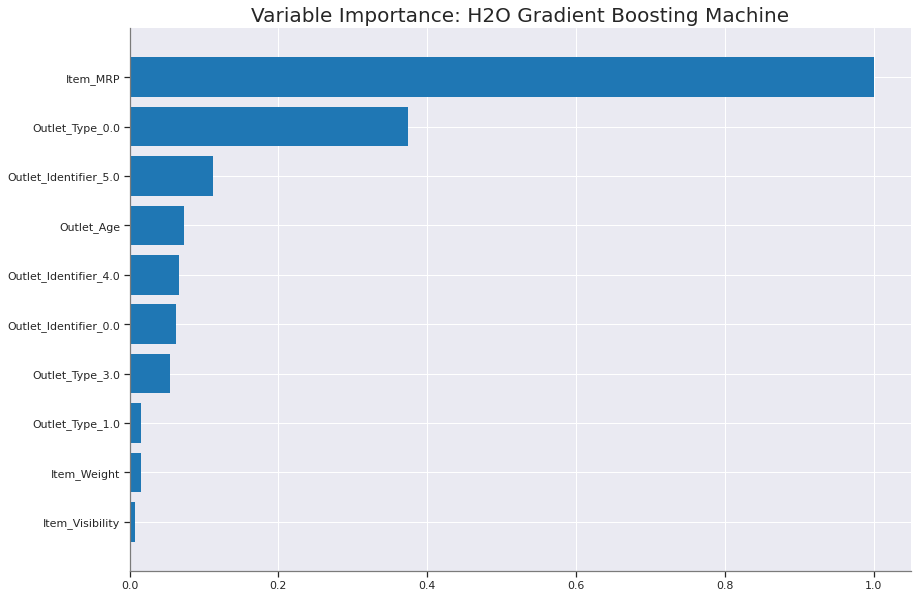

<Figure size 432x288 with 0 Axes>

In [68]:
# Variable Importance Plot
best_model_with_outliers.varimp_plot()

# Method - 2
### Shap Value Plot

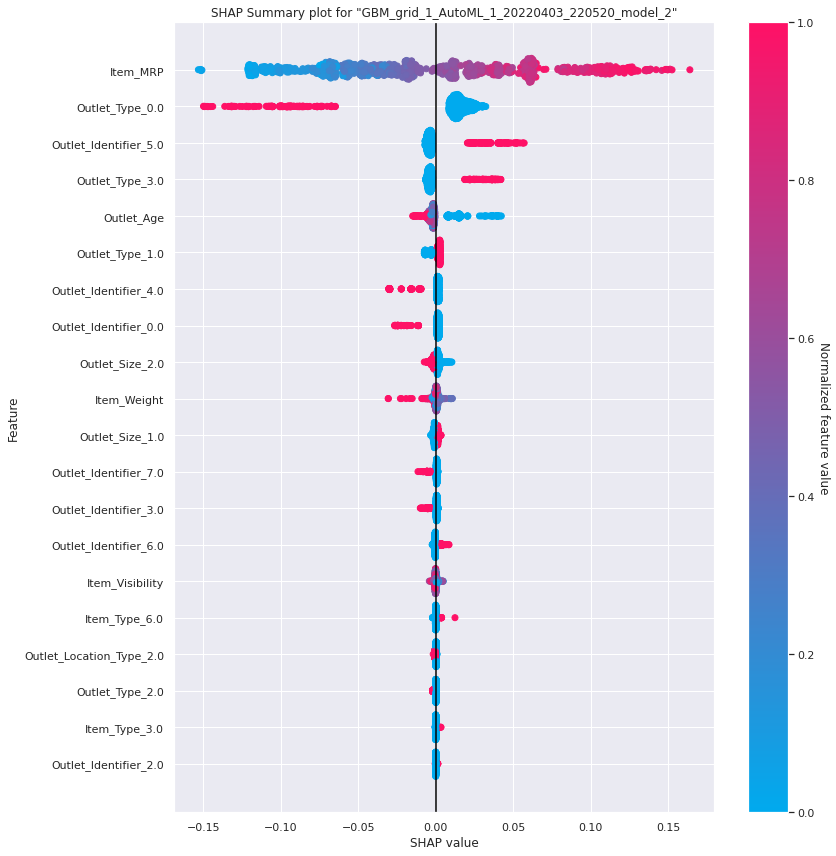

In [69]:
# SHAP value plot
best_model_with_outliers.shap_summary_plot(test_data)

# Method - 3
## Permutation Importance Plot

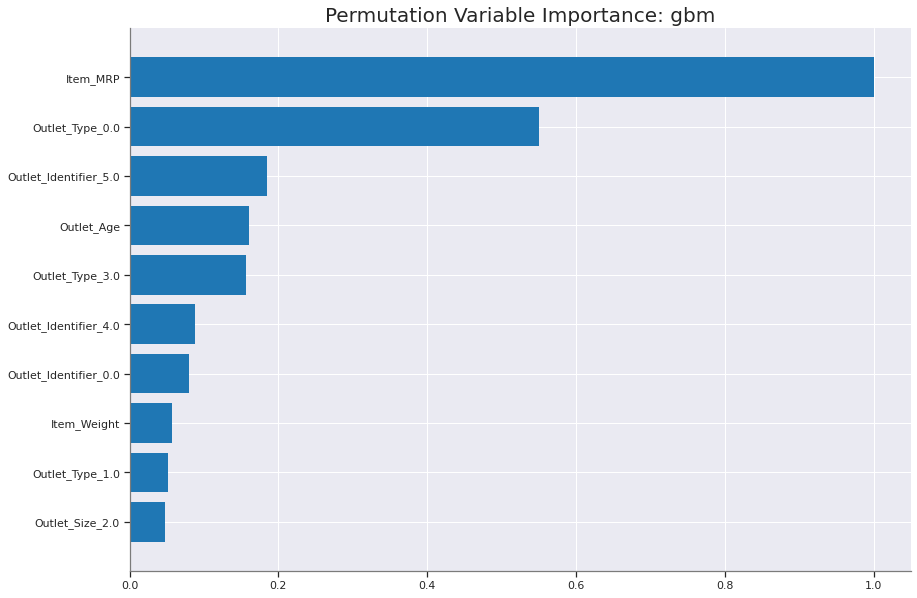


Variable Importances: 


,Variable,Relative Importance,Scaled Importance,Percentage
0,Item_MRP,0.111323,1.000000,0.378002
1,Outlet_Type_0.0,0.061196,0.549719,0.207795
2,Outlet_Identifier_5.0,0.020573,0.184803,0.069856
3,Outlet_Age,0.017936,0.161116,0.060902
4,Outlet_Type_3.0,0.017433,0.156600,0.059195
5,Outlet_Identifier_4.0,0.009823,0.088237,0.033354
6,Outlet_Identifier_0.0,0.008854,0.079531,0.030063
7,Item_Weight,0.006397,0.057460,0.021720
8,Outlet_Type_1.0,0.005744,0.051602,0.019506
9,Outlet_Size_2.0,0.005319,0.047783,0.018062



See the whole table with table.as_data_frame()


In [70]:
# Permutation Importance Plot
best_model_with_outliers.permutation_importance_plot(test_data)

In [71]:
coeff_table = best_model_with_outliers._model_json["output"]["variable_importances"]

In [72]:
# Relative Importance, Scaled Importance and Percentage of all variables to predict the target
print(coeff_table.as_data_frame())

                    variable  relative_importance  scaled_importance  \
0                   Item_MRP           250.642929           1.000000   
1            Outlet_Type_0.0            93.754860           0.374057   
2      Outlet_Identifier_5.0            28.125856           0.112215   
3                 Outlet_Age            18.218321           0.072686   
4      Outlet_Identifier_4.0            16.727278           0.066737   
5      Outlet_Identifier_0.0            15.644478           0.062417   
6            Outlet_Type_3.0            13.639451           0.054418   
7            Outlet_Type_1.0             3.776147           0.015066   
8                Item_Weight             3.703639           0.014777   
9            Item_Visibility             1.838452           0.007335   
10     Outlet_Identifier_3.0             0.685372           0.002734   
11           Outlet_Size_2.0             0.629980           0.002513   
12     Outlet_Identifier_7.0             0.426940           0.00

# Method - 4 and 5
## Partial Dependence Plot and Individual Conditional Expectation Plot

From the below summary of Model the Partial Dependence Plot Re-inforces our conclusion on variable importance

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,mean_residual_deviance,rmse,mse,mae,rmsle,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_BestOfFamily_4_AutoML_1_20220403_220520,0.00680253,0.0824775,0.00680253,0.0578069,0.0656889,507,0.039088,StackedEnsemble
StackedEnsemble_AllModels_3_AutoML_1_20220403_220520,0.00680264,0.0824781,0.00680264,0.0577574,0.0656867,814,0.057545,StackedEnsemble
StackedEnsemble_AllModels_2_AutoML_1_20220403_220520,0.00681482,0.0825519,0.00681482,0.0579504,0.0657657,666,0.040502,StackedEnsemble
StackedEnsemble_BestOfFamily_3_AutoML_1_20220403_220520,0.00681976,0.0825818,0.00681976,0.058058,0.0657994,620,0.036741,StackedEnsemble
GBM_grid_1_AutoML_1_20220403_220520_model_2,0.00682106,0.0825897,0.00682106,0.0579127,0.0657222,656,0.00844,GBM
StackedEnsemble_BestOfFamily_2_AutoML_1_20220403_220520,0.00683669,0.0826843,0.00683669,0.0582632,0.0658842,569,0.020138,StackedEnsemble
StackedEnsemble_AllModels_1_AutoML_1_20220403_220520,0.00683804,0.0826924,0.00683804,0.0581823,0.0658736,662,0.029093,StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_1_20220403_220520,0.00683828,0.0826939,0.00683828,0.0582371,0.0658852,581,0.012107,StackedEnsemble
GBM_1_AutoML_1_20220403_220520,0.00684829,0.0827544,0.00684829,0.0581322,0.0659032,3250,0.011864,GBM
GBM_grid_1_AutoML_1_20220403_220520_model_3,0.00690483,0.0830953,0.00690483,0.0584666,0.0661501,602,0.010616,GBM


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

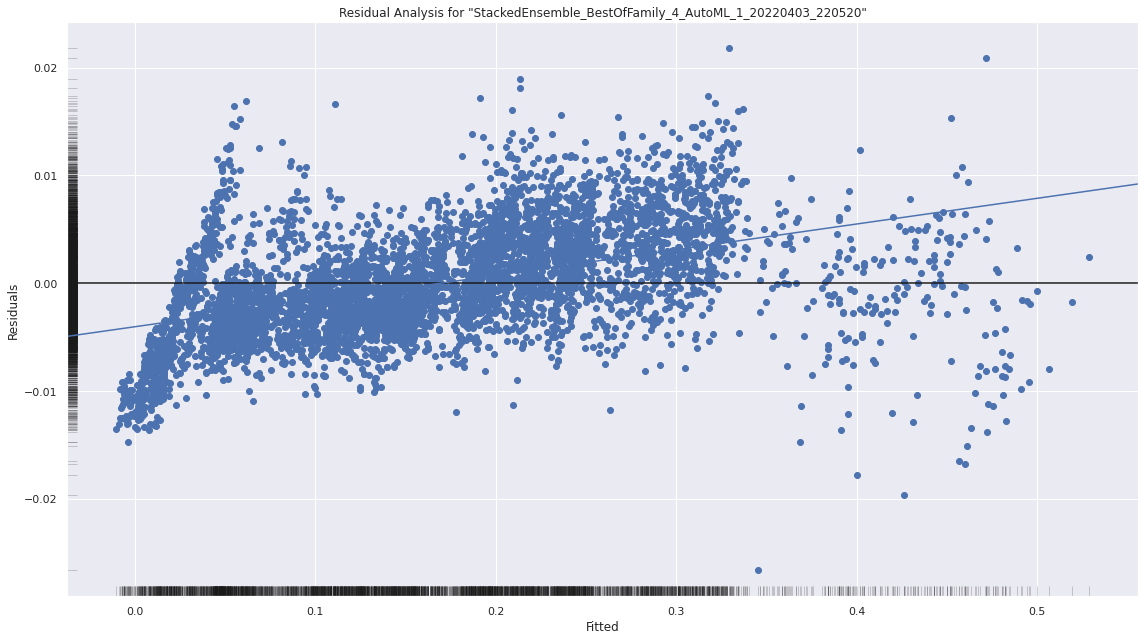

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

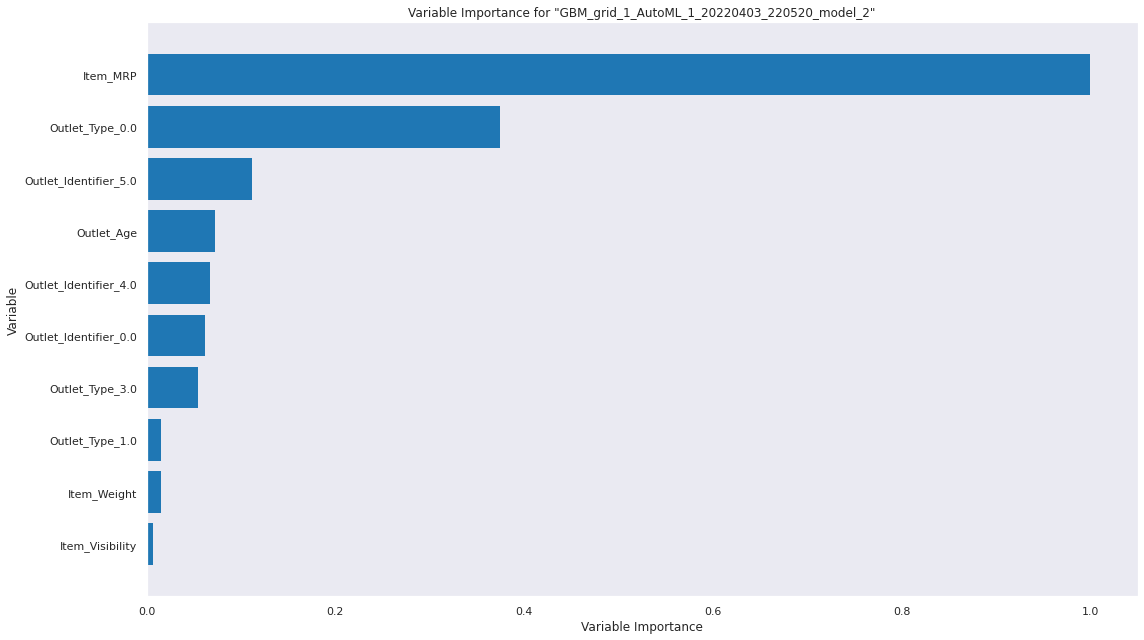

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

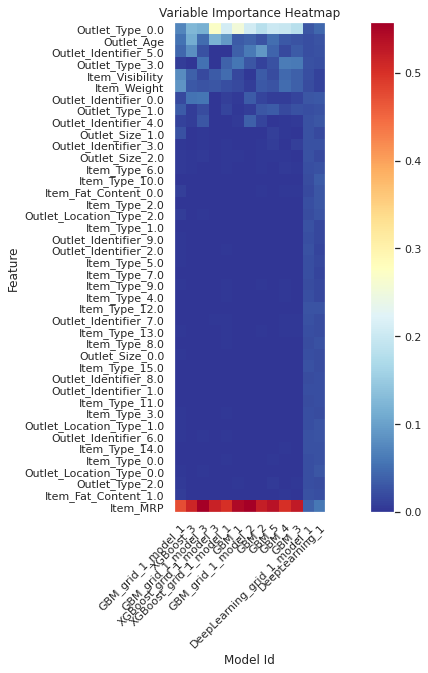

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

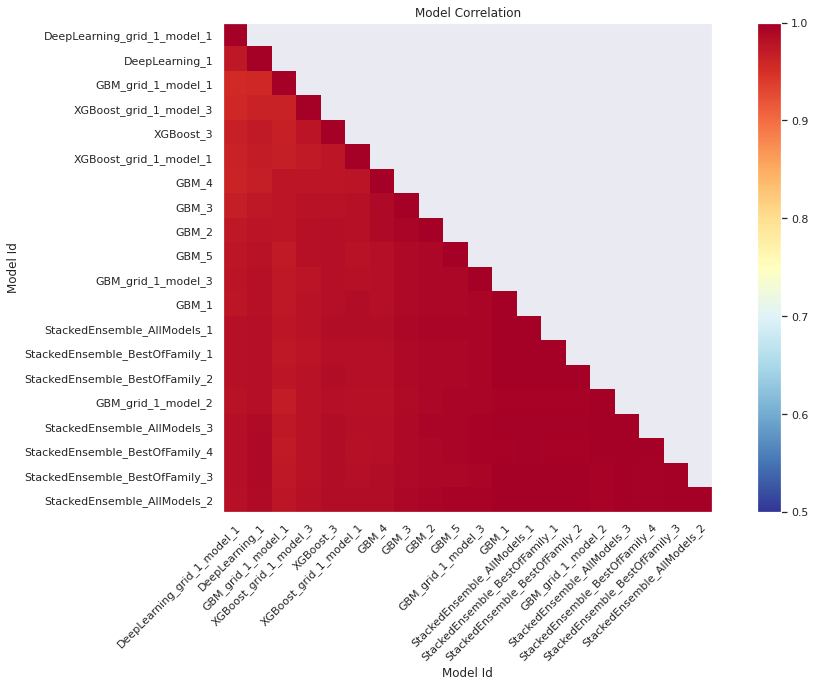

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

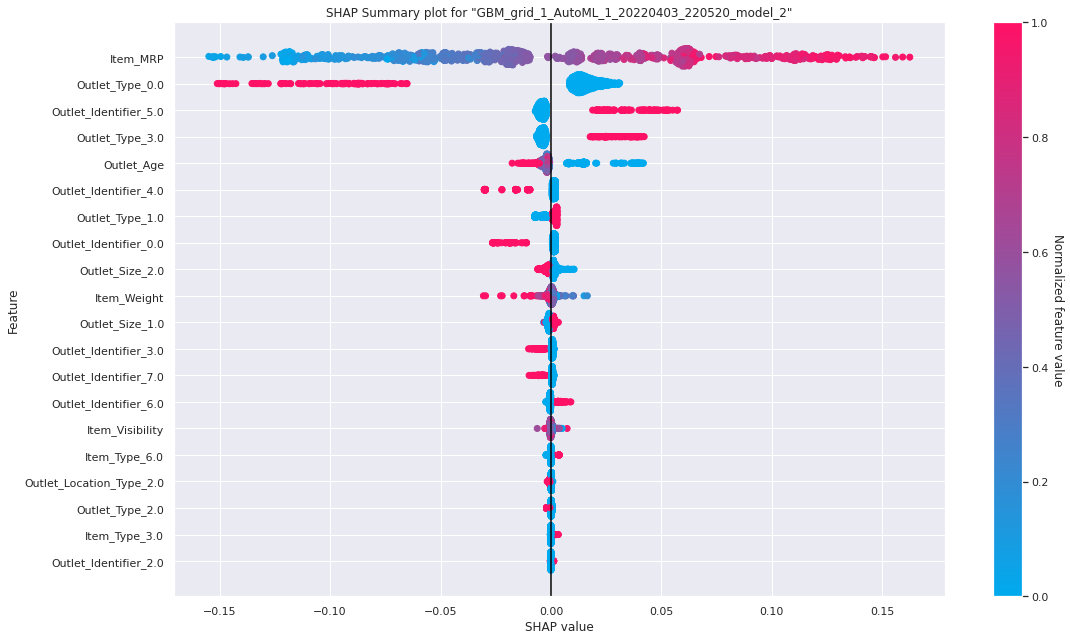

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

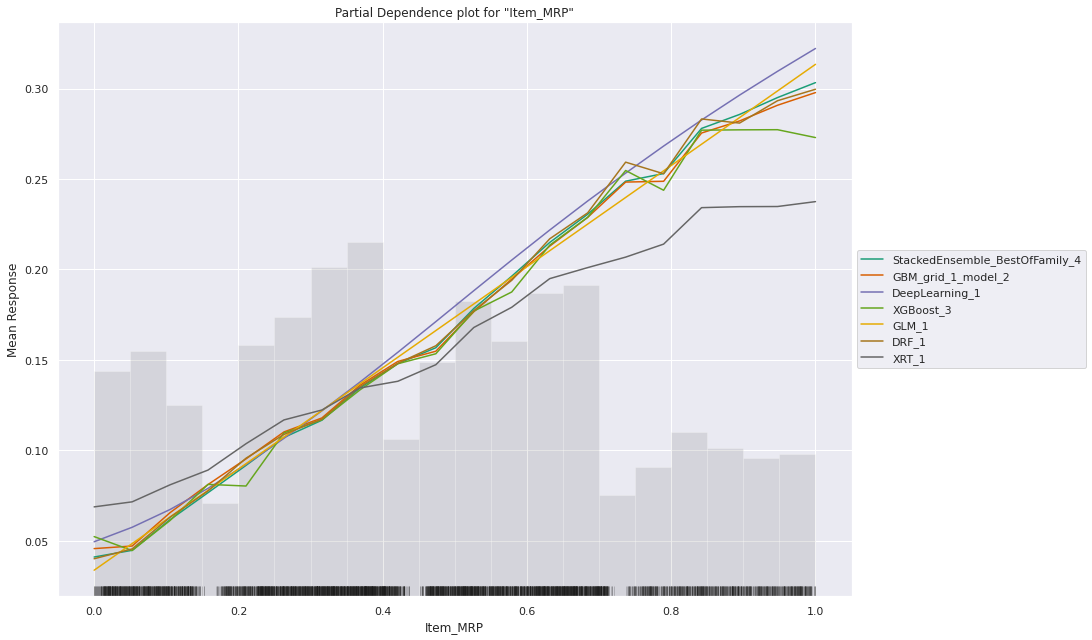

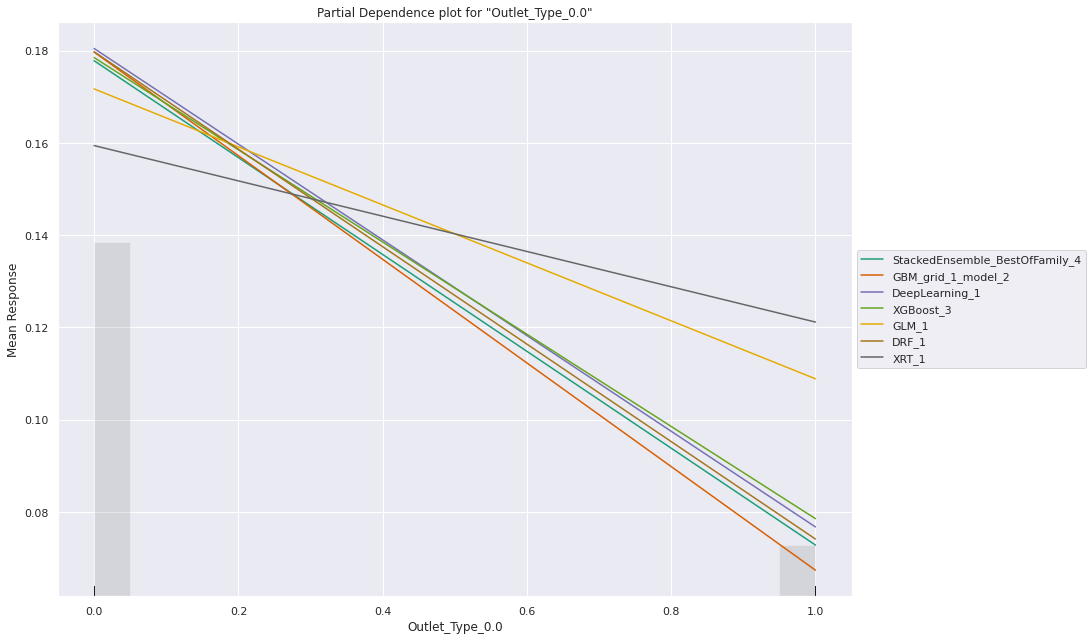

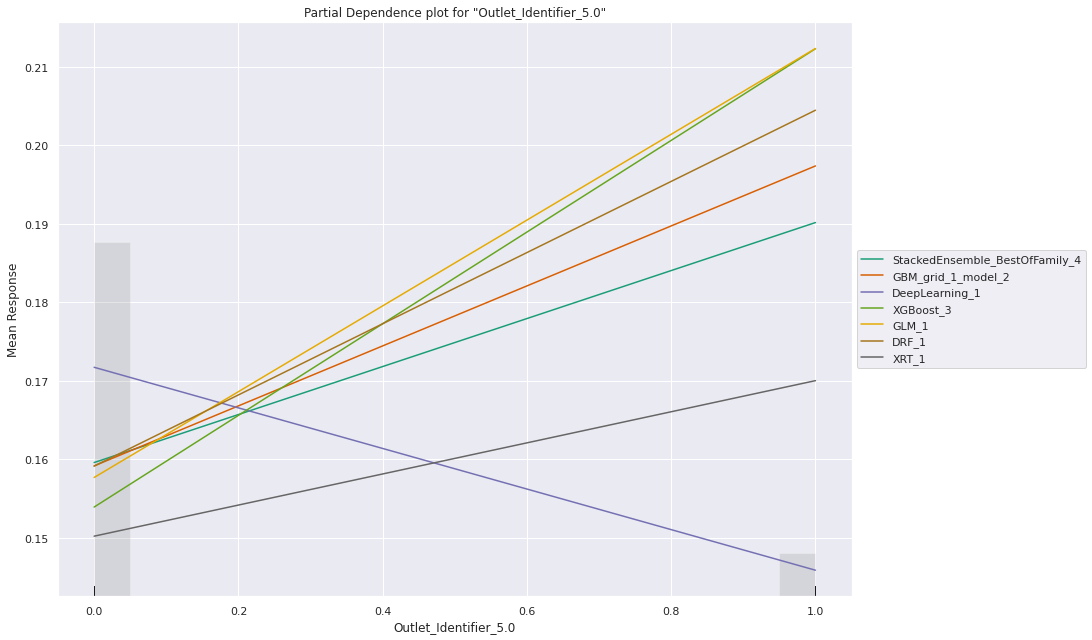

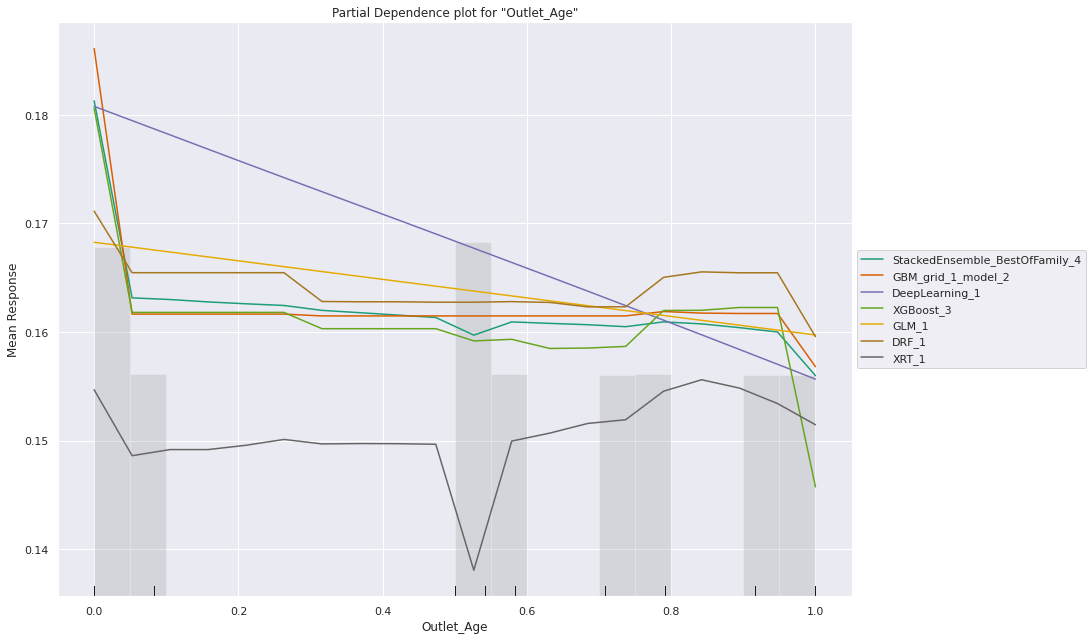

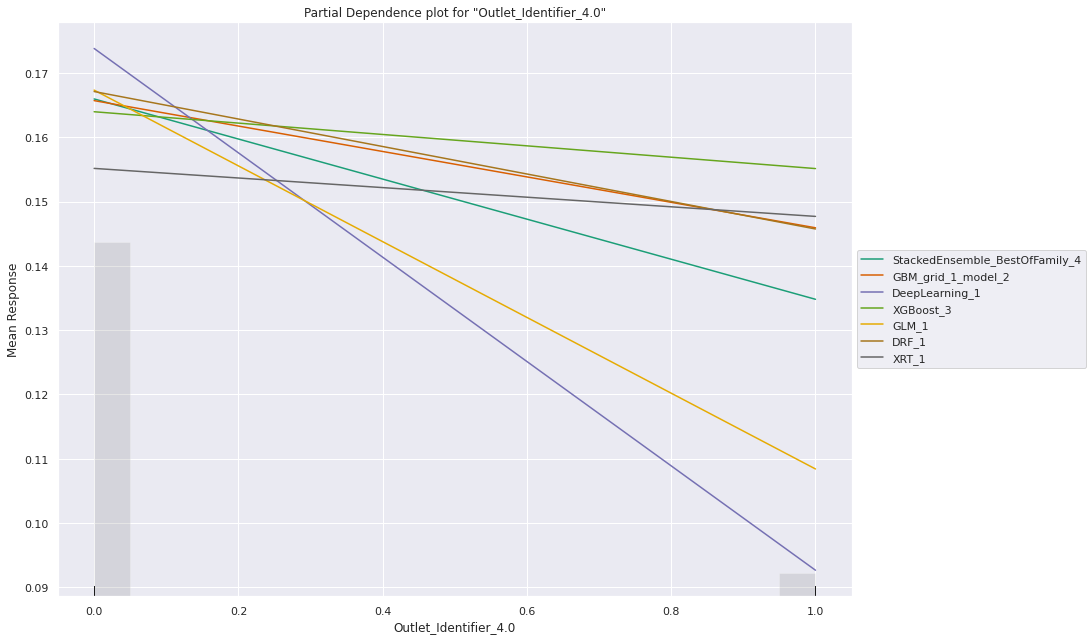

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

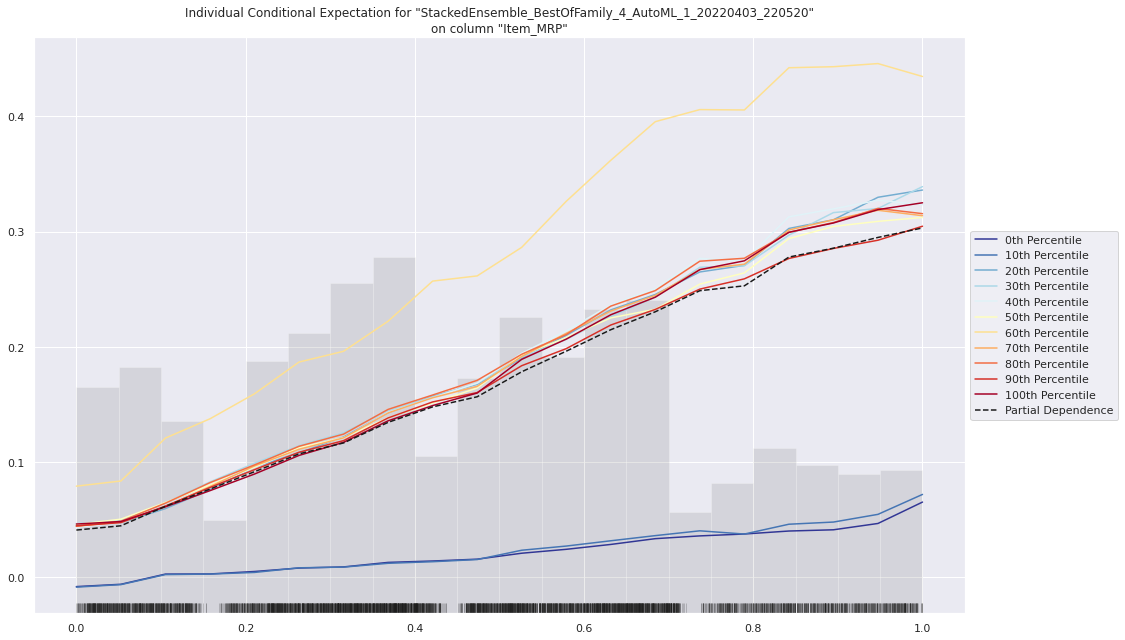

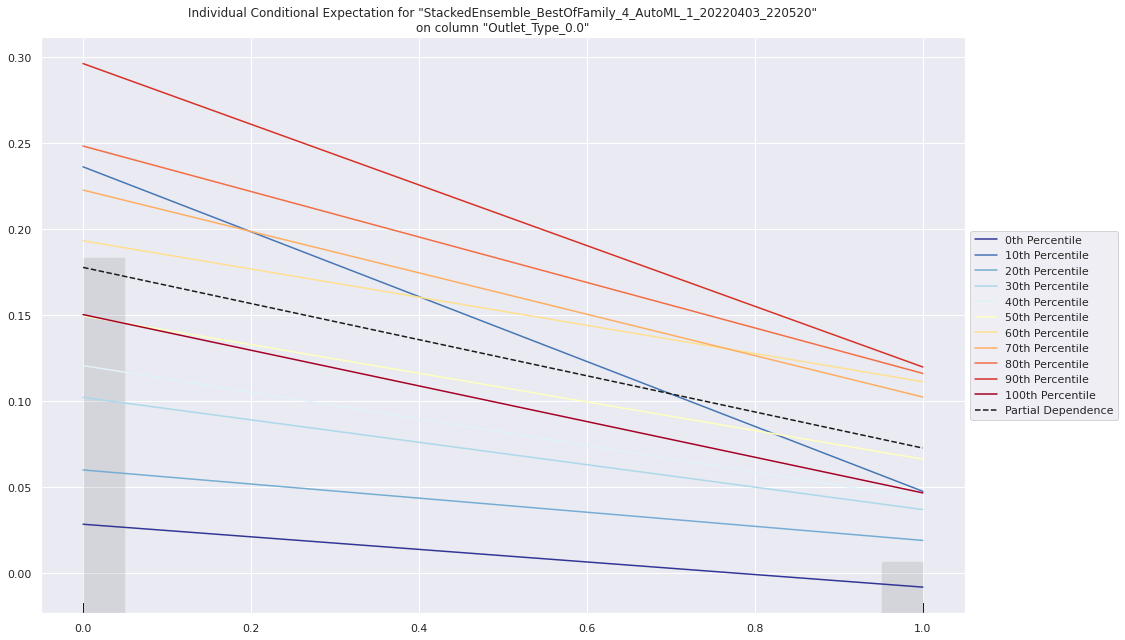

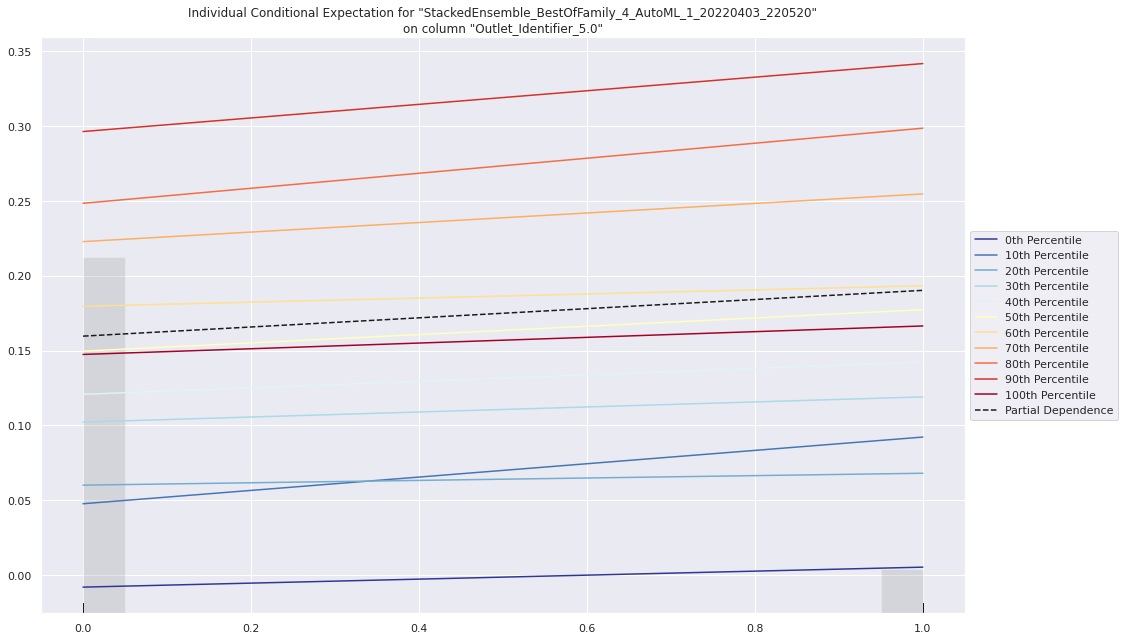

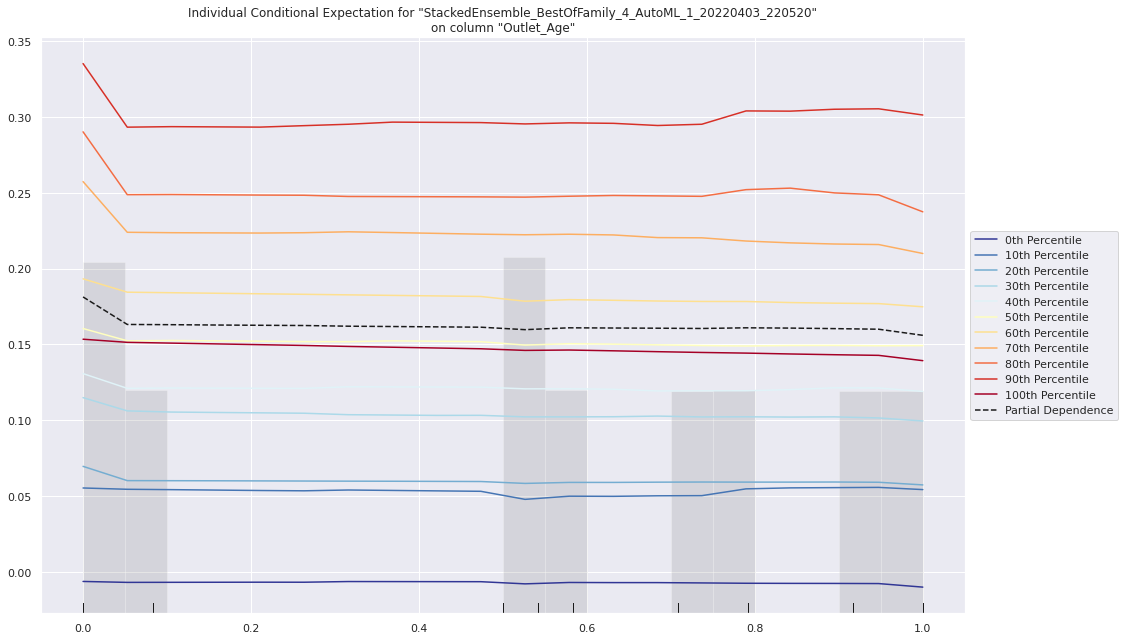

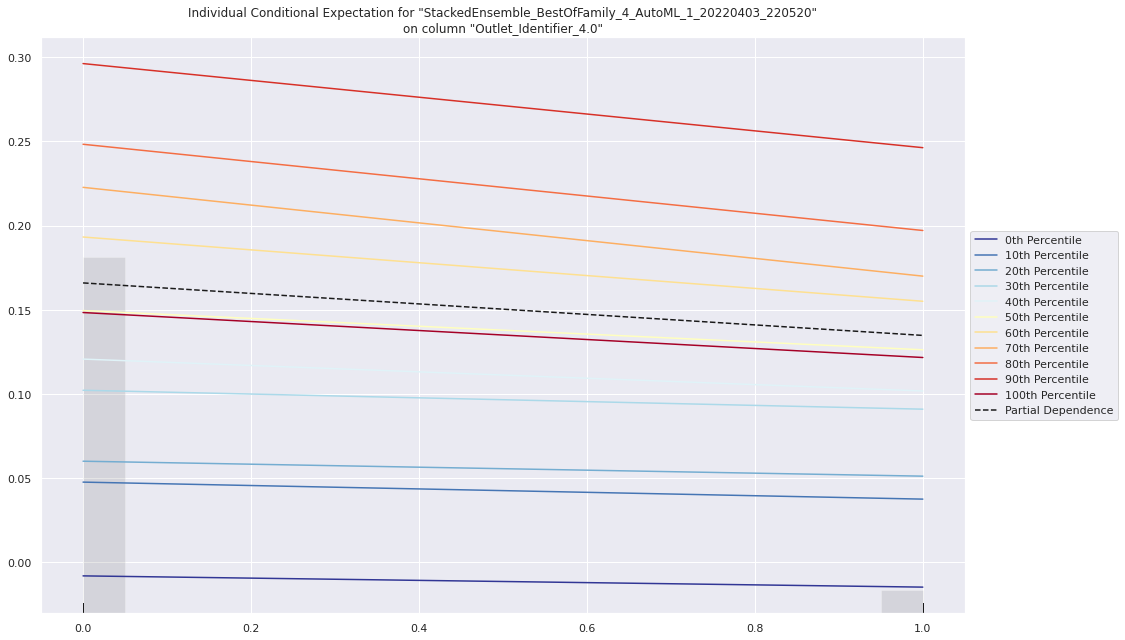

In [73]:
exa = model_with_outliers[2].explain(test_data)

**Question 8:-** Which predictor variables are the most important?       
**Answer 8:-** 
From the above 5 methods we can infer that
- Item_MRP
- Outlet_Type_0.0
- Outlet_Identifier_5.0
- Outlet_Age
- Outlet_Identifier_4.0

Are the most significant features to predict the target variable.

#Imputing Known data to see how well the imputation techniques recovers the data

- According to the directions of Prof. Nik, I have randomly selected 1000 rows with complete data from my dataset, and created datasets with 1%, 5%, and 10% missing data to see how well my imputation techniques recovers them

In [74]:
train_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,156.0,9.300,0.0,0.016047,4.0,249.8092,9.0,1999,1.0,0.0,1.0,3735.1380,15
1,8.0,5.920,1.0,0.019278,14.0,48.2692,3.0,2009,1.0,2.0,2.0,443.4228,25
2,662.0,17.500,0.0,0.016760,10.0,141.6180,9.0,1999,1.0,0.0,1.0,2097.2700,15
3,1121.0,19.200,1.0,0.000000,6.0,182.0950,0.0,1998,NaN,2.0,0.0,732.3800,14
4,1297.0,8.930,0.0,0.000000,9.0,53.8614,1.0,1987,0.0,2.0,1.0,994.7052,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370.0,6.865,0.0,0.056783,13.0,214.5218,1.0,1987,0.0,2.0,1.0,2778.3834,3
8519,897.0,8.380,1.0,0.046982,0.0,108.1570,7.0,2002,NaN,1.0,1.0,549.2850,18
8520,1357.0,10.600,0.0,0.035186,8.0,85.1224,6.0,2004,2.0,1.0,1.0,1193.1136,20
8521,681.0,7.210,1.0,0.145221,13.0,103.1332,3.0,2009,1.0,2.0,2.0,1845.5976,25


In [75]:
# Selecting 1000 random rows with no null data points
train_df_selected = train_df[~train_df["Item_Weight"].isnull()]
train_df_selected = train_df_selected[~train_df_selected["Outlet_Size"].isnull()]
train_df_selected = train_df_selected.sample(n=1000)

In [76]:
# Double checking the data, if we got any null data points
train_df_selected.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Outlet_Age                   0
dtype: int64

In [77]:
# Scaling the features using min-max scaling to make the range desirable
train_df_selected = feature_scaling(
    train_df_selected
)  # Scaling Features using Min-Max scaling
train_df_selected = train_df_selected.drop(["Outlet_Establishment_Year"], axis=1)

In [78]:
# Creating three extra coloumns of Item_Weight for performing Data Imputation techniques
train_df_selected["Item_Weight_1_percent"] = train_df_selected[["Item_Weight"]]
train_df_selected["Item_Weight_5_percent"] = train_df_selected[["Item_Weight"]]
train_df_selected["Item_Weight_10_percent"] = train_df_selected[["Item_Weight"]]

In [79]:
train_df_selected

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_Weight_1_percent,Item_Weight_5_percent,Item_Weight_10_percent
0,0.847882,0.236897,0.0,0.276298,0.600000,0.471610,0.000,0.0,1.0,0.0,0.310401,0.000000,0.236897,0.236897,0.236897
1,0.462773,0.514825,1.0,0.202352,0.866667,0.245831,1.000,0.5,0.0,0.0,0.070425,0.545455,0.514825,0.514825,0.514825
2,0.272786,0.326146,0.0,0.245109,0.333333,0.464612,0.250,0.5,1.0,1.0,0.256399,1.000000,0.326146,0.326146,0.326146
3,0.449936,0.055406,0.0,0.080427,0.333333,0.220228,0.875,1.0,0.0,0.0,0.121764,0.454545,0.055406,0.055406,0.055406
4,0.684211,0.937107,1.0,0.000000,0.000000,0.707708,0.000,0.0,1.0,0.0,0.385116,0.000000,0.937107,0.937107,0.937107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.365854,0.302186,0.0,0.275097,0.866667,0.969095,0.250,0.5,1.0,1.0,0.309661,1.000000,0.302186,0.302186,0.302186
996,0.138639,0.054507,1.0,0.000000,0.000000,0.415405,0.875,1.0,0.0,0.0,0.400355,0.454545,0.054507,0.054507,0.054507
997,0.009628,0.246481,0.0,0.348344,0.933333,0.474470,0.875,1.0,0.0,0.0,0.216008,0.454545,0.246481,0.246481,0.246481
998,0.138639,0.054507,1.0,0.258280,0.000000,0.431728,0.625,1.0,0.5,0.0,0.254623,0.772727,0.054507,0.054507,0.054507


In [80]:
# Function to calculate percentage of missing data in dataset
def get_percent_missing(dataframe):
    percent_missing = dataframe.isnull().sum() * 100 / len(dataframe)
    missing_value_df = pd.DataFrame(
        {"column_name": dataframe.columns, "percent_missing": percent_missing}
    )
    return missing_value_df


# Function to create missing values
def create_missing(dataframe, percent, col):
    dataframe.loc[dataframe.sample(frac=percent).index, col] = np.nan


# Modified function to impute data using mean imputation
def mean_impute(train_df):
    mm_impute_train_df = train_df.copy()  # Make a copy of dataframe for imputation
    mm_impute_train_df["Item_Weight_1_percent"] = mm_impute_train_df[
        "Item_Weight_1_percent"
    ].fillna(mm_impute_train_df["Item_Weight"].mean())
    mm_impute_train_df["Item_Weight_5_percent"] = mm_impute_train_df[
        "Item_Weight_5_percent"
    ].fillna(mm_impute_train_df["Item_Weight"].mean())
    mm_impute_train_df["Item_Weight_10_percent"] = mm_impute_train_df[
        "Item_Weight_10_percent"
    ].fillna(mm_impute_train_df["Item_Weight"].mean())
    return mm_impute_train_df


# Function to calculate how well the data has been recovered after performing data imputation
def percentage_change(l1, l2):
    percent_change = abs(l2 - l1) / (l1 + 0.000000001)
    avg_change = (percent_change.sum() / percent_change.count()) * 100
    return avg_change

In [81]:
print(get_percent_missing(train_df_selected))

                                   column_name  percent_missing
Item_Identifier                Item_Identifier              0.0
Item_Weight                        Item_Weight              0.0
Item_Fat_Content              Item_Fat_Content              0.0
Item_Visibility                Item_Visibility              0.0
Item_Type                            Item_Type              0.0
Item_MRP                              Item_MRP              0.0
Outlet_Identifier            Outlet_Identifier              0.0
Outlet_Size                        Outlet_Size              0.0
Outlet_Location_Type      Outlet_Location_Type              0.0
Outlet_Type                        Outlet_Type              0.0
Item_Outlet_Sales            Item_Outlet_Sales              0.0
Outlet_Age                          Outlet_Age              0.0
Item_Weight_1_percent    Item_Weight_1_percent              0.0
Item_Weight_5_percent    Item_Weight_5_percent              0.0
Item_Weight_10_percent  Item_Weight_10_p

In [82]:
# Creating missing values in respected coloumns to perform data imputation
create_missing(train_df_selected, 0.01, "Item_Weight_1_percent")
create_missing(train_df_selected, 0.05, "Item_Weight_5_percent")
create_missing(train_df_selected, 0.1, "Item_Weight_10_percent")

In [83]:
# Double Checking the imputation operation
print(get_percent_missing(train_df_selected))

                                   column_name  percent_missing
Item_Identifier                Item_Identifier              0.0
Item_Weight                        Item_Weight              0.0
Item_Fat_Content              Item_Fat_Content              0.0
Item_Visibility                Item_Visibility              0.0
Item_Type                            Item_Type              0.0
Item_MRP                              Item_MRP              0.0
Outlet_Identifier            Outlet_Identifier              0.0
Outlet_Size                        Outlet_Size              0.0
Outlet_Location_Type      Outlet_Location_Type              0.0
Outlet_Type                        Outlet_Type              0.0
Item_Outlet_Sales            Item_Outlet_Sales              0.0
Outlet_Age                          Outlet_Age              0.0
Item_Weight_1_percent    Item_Weight_1_percent              1.0
Item_Weight_5_percent    Item_Weight_5_percent              5.0
Item_Weight_10_percent  Item_Weight_10_p

In [84]:
# Imputing data using KNN imputation
knn_imputed_train_df_selected = knn_impute(train_df_selected)

Imputing row 1/1000 with 0 missing, elapsed time: 0.192
Imputing row 101/1000 with 1 missing, elapsed time: 0.194
Imputing row 201/1000 with 0 missing, elapsed time: 0.195
Imputing row 301/1000 with 1 missing, elapsed time: 0.197
Imputing row 401/1000 with 0 missing, elapsed time: 0.198
Imputing row 501/1000 with 1 missing, elapsed time: 0.199
Imputing row 601/1000 with 0 missing, elapsed time: 0.200
Imputing row 701/1000 with 0 missing, elapsed time: 0.201
Imputing row 801/1000 with 0 missing, elapsed time: 0.202
Imputing row 901/1000 with 0 missing, elapsed time: 0.204


In [85]:
# Double checking the imputation
print(get_percent_missing(knn_imputed_train_df_selected))

                                   column_name  percent_missing
Item_Identifier                Item_Identifier              0.0
Item_Weight                        Item_Weight              0.0
Item_Fat_Content              Item_Fat_Content              0.0
Item_Visibility                Item_Visibility              0.0
Item_Type                            Item_Type              0.0
Item_MRP                              Item_MRP              0.0
Outlet_Identifier            Outlet_Identifier              0.0
Outlet_Size                        Outlet_Size              0.0
Outlet_Location_Type      Outlet_Location_Type              0.0
Outlet_Type                        Outlet_Type              0.0
Item_Outlet_Sales            Item_Outlet_Sales              0.0
Outlet_Age                          Outlet_Age              0.0
Item_Weight_1_percent    Item_Weight_1_percent              0.0
Item_Weight_5_percent    Item_Weight_5_percent              0.0
Item_Weight_10_percent  Item_Weight_10_p

In [86]:
# Performing Mean Imputation
mm_imputed_train_df_selected = mean_impute(train_df_selected)

In [87]:
# Double Checking the operation of mean-imputation
print(get_percent_missing(mm_imputed_train_df_selected))

                                   column_name  percent_missing
Item_Identifier                Item_Identifier              0.0
Item_Weight                        Item_Weight              0.0
Item_Fat_Content              Item_Fat_Content              0.0
Item_Visibility                Item_Visibility              0.0
Item_Type                            Item_Type              0.0
Item_MRP                              Item_MRP              0.0
Outlet_Identifier            Outlet_Identifier              0.0
Outlet_Size                        Outlet_Size              0.0
Outlet_Location_Type      Outlet_Location_Type              0.0
Outlet_Type                        Outlet_Type              0.0
Item_Outlet_Sales            Item_Outlet_Sales              0.0
Outlet_Age                          Outlet_Age              0.0
Item_Weight_1_percent    Item_Weight_1_percent              0.0
Item_Weight_5_percent    Item_Weight_5_percent              0.0
Item_Weight_10_percent  Item_Weight_10_p

For MICE imputation, we have to be carefull and create three different dataframes, because MICE imputation uses all features in the data to predict(impute) the missing value. Having all coloumns in one dataframe can lead to the issue of co-linearity. 

In [88]:
# Dataframe for 1% missing value
train_df_selected_1_percent = train_df_selected.drop(
    ["Item_Weight", "Item_Weight_5_percent", "Item_Weight_10_percent"], axis=1
)
# Dataframe for 5% missing value
train_df_selected_5_percent = train_df_selected.drop(
    ["Item_Weight", "Item_Weight_1_percent", "Item_Weight_10_percent"], axis=1
)
# Dataframe for 10% missing value
train_df_selected_10_percent = train_df_selected.drop(
    ["Item_Weight", "Item_Weight_1_percent", "Item_Weight_5_percent"], axis=1
)

# Performing Imputation on Dataframe with 1% missing values
imputed_train_df_selected_1_percent = mice_impute(train_df_selected_1_percent)
# Performing Imputation on Dataframe with 5% missing values
imputed_train_df_selected_5_percent = mice_impute(train_df_selected_5_percent)
# Performing Imputation on Dataframe with 10% missing values
imputed_train_df_selected_10_percent = mice_impute(train_df_selected_10_percent)

In [89]:
# This is the average % error on residuals for 1% missing data imputed using KNN
print("Average % error on residuals for 1% missing data imputed using KNN")
print(
    percentage_change(
        knn_imputed_train_df_selected["Item_Weight"],
        knn_imputed_train_df_selected["Item_Weight_1_percent"],
    )
)

Average % error on residuals for 1% missing data imputed using KNN
0.47854412631559395


In [90]:
# This is the average % error on residuals for 1% missing data imputed using Mean Imputation
print("Average % error on residuals for 1% missing data imputed using Mean Imputation")
print(
    percentage_change(
        mm_imputed_train_df_selected["Item_Weight"],
        mm_imputed_train_df_selected["Item_Weight_1_percent"],
    )
)

Average % error on residuals for 1% missing data imputed using Mean Imputation
0.5338887149048976


In [91]:
# This is the average % error on residuals for 1% missing data imputed using MICE Imputation
print("Average % error on residuals for 1% missing data imputed using MICE Imputation")
print(
    percentage_change(
        train_df_selected["Item_Weight"],
        imputed_train_df_selected_1_percent["Item_Weight_1_percent"],
    )
)

Average % error on residuals for 1% missing data imputed using MICE Imputation
0.5405343674349702


In [92]:
# This is the average % error on residuals for 5% missing data imputed using KNN
print("Average % error on residuals for 5% missing data imputed using KNN")
print(
    percentage_change(
        knn_imputed_train_df_selected["Item_Weight"],
        knn_imputed_train_df_selected["Item_Weight_5_percent"],
    )
)

Average % error on residuals for 5% missing data imputed using KNN
4.305169558062589


In [93]:
# This is the average % error on residuals for 5% missing data imputed using Mean Imputation
print("Average % error on residuals for 5% missing data imputed using Mean Imputation")
print(
    percentage_change(
        mm_imputed_train_df_selected["Item_Weight"],
        mm_imputed_train_df_selected["Item_Weight_5_percent"],
    )
)

Average % error on residuals for 5% missing data imputed using Mean Imputation
4.4504927088090405


In [94]:
# This is the average % error on residuals for 5% missing data imputed using MICE Imputation
print("Average % error on residuals for 5% missing data imputed using MICE Imputation")
print(
    percentage_change(
        train_df_selected["Item_Weight"],
        imputed_train_df_selected_5_percent["Item_Weight_5_percent"],
    )
)

Average % error on residuals for 5% missing data imputed using MICE Imputation
4.380738757094642


In [95]:
# This is the average % error on residuals for 10% missing data imputed using KNN Imputation
print("Average % error on residuals for 10% missing data imputed using KNN Imputation")
print(
    percentage_change(
        knn_imputed_train_df_selected["Item_Weight"],
        knn_imputed_train_df_selected["Item_Weight_10_percent"],
    )
)

Average % error on residuals for 10% missing data imputed using KNN Imputation
8.417544027024112


In [96]:
# This is the average % error on residuals for 10% missing data imputed using Mean Imputation
print("Average % error on residuals for 10% missing data imputed using Mean Imputation")
print(
    percentage_change(
        mm_imputed_train_df_selected["Item_Weight"],
        mm_imputed_train_df_selected["Item_Weight_10_percent"],
    )
)

Average % error on residuals for 10% missing data imputed using Mean Imputation
9.20711526836123


In [97]:
# This is the average % error on residuals for 10% missing data imputed using MICE Imputation
print("Average % error on residuals for 10% missing data imputed using MICE Imputation")
print(
    percentage_change(
        train_df_selected["Item_Weight"],
        imputed_train_df_selected_10_percent["Item_Weight_10_percent"],
    )
)

Average % error on residuals for 10% missing data imputed using MICE Imputation
9.12310905096803


**Question 12:-** Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is to remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

**Answer 12:-** Here is the %residual error(Bias and Variance) for all 3 methods and 3 datasets We can conclude that KNN imputation works best for imputing data on my dataset. 


## References
- https://towardsdatascience.com/preprocessing-encode-and-knn-impute-all-categorical-features-fast-b05f50b4dfaa
- https://www.analyticsvidhya.com/blog/2016/02/bigmart-sales-solution-top-20/
- https://www.kaggle.com/code/ambarishdeb/big-mart-sales-eda-ml